# Análise Exploratória de Dados

## Instalando pacotes e Importando os pacotes

In [1]:
#!pip install openpyxl
#!pip install imblearn
#!pip install tensorflow
#!pip install SMOTE
#!pip uninstall keras
#!pip install xgboost
#!pip uninstall imbLearn
#

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm   # pip install statsmodels
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from xgboost import XGBClassifier # pip install xgboost
from collections import Counter
import os
import openpyxl # pip install openpyxl



In [3]:
# Carregando arquivo de dados
train_data = pd.read_csv('E:/PYTHON/Ifood/ifood_csv.csv')
train_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


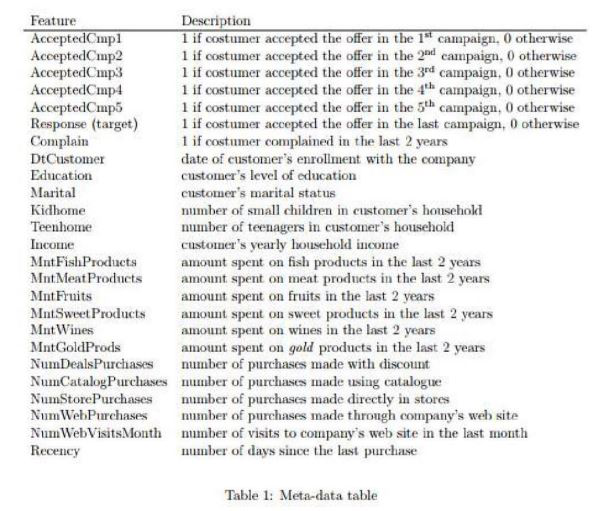

In [4]:
# Arquiterura dos Dados

from PIL import Image
%matplotlib inline
im = Image.open ("E:\PYTHON\Ifood\Img_tabela.jpg")
#im.show()
im



## Configurando

In [5]:
# Iteration
iteration = 1


# Setting Seed
seeds = [101, 2019, 555, 975, 369]

seed = seeds[iteration]


# Splitting the train and test dataset
#train_data, test_data, train_label, test_label = train_test_split(database,
#                                                                  database["Response"],
#                                                                 test_size=0.2,
#                                                                  random_state=seed)

print(train_data.info())
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# 1. Explorando os dados
## 1.1 Valores Ausentes

In [6]:
# Recebe um dataframe e retorna uma tabela com contagem de valores ausentes, porcentagem e sinalizador superior a 3%.
def missing_rep(df):
    miss = df.isna().sum()
    miss = miss[miss>0]
    miss_p = miss/df.shape[0]
    miss_t = miss_p>0.03

    return pd.DataFrame({"Ausentes" : miss, "Proporção dos Ausentes" : miss_p, "Mais Alto que 3%" : miss_t})



missing_rep(train_data)

,Ausentes,Proporção dos Ausentes,Mais Alto que 3%
Income,24,0.010714,False


These missings will be dealt with further into our exploration.

## 1.2 Análise de Variáveis Categóricas

#### Taixa Média de resposta quase 15%.

In [7]:
train_data["Response"].mean() # Close to 15%

0.14910714285714285

In [8]:
#Função identificar valores abaixo 15 e falsos 

def highlight_above_threshold(val):
    if val < .15:
        color = 'red'
    else:
        color = 'black'
    #color = 'red' if val < .15 else 'black'
    return 'color: %s' % color

### 1.2.1  (Tabela descritiva de recursos categoriais)

In [9]:
# List of categorical features:
feat_c = ["Education", "Marital_Status", "Kidhome", "Teenhome", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4",
         "AcceptedCmp5", "Complain"]



# Receives dataframe, list of categorical features names(can be just 1), targer variable name,
# number of minimu observations to be taken into account and threshold of discrimination ability and
# returns a table with descriptive stats about these categorical features.
def cat_feat_describe(df, fc, target, n, thresh):

    fl = []
    
    
    
    if (type(fc)==list):
    
        for feature in fc:
            fl.append(df.groupby([feature]).agg({target : ["count", "mean"]}))    

            fm = pd.concat(fl, keys=fc)

            fm = pd.DataFrame({"Número de observações" : fm.iloc[:,0], "Capacidade de discriminação" : fm.iloc[:,1],
                                 "Mais de n observações" : fm.iloc[:,0]>n,
                                 "Maior capacidade de discriminação do que o Limiar" : fm.iloc[:,1]>thresh,
                                 "Ambos Verdadeiros" : ((fm.iloc[:,0]>n) & (fm.iloc[:,1]>thresh))})
    else:
        fm = (df.groupby(fc).agg({target : ["count", "mean"]}))
        
        fm = pd.DataFrame({"Número de observações" : fm.iloc[:,0], "Capacidade de discriminação" : fm.iloc[:,1],
                                 "Mais de n observações" : fm.iloc[:,0]>n,
                                 "Maior capacidade de discriminação do que o Limiar" : fm.iloc[:,1]>thresh,
                                 "Ambos Verdadeiros" : ((fm.iloc[:,0]>n) & (fm.iloc[:,1]>thresh))})
        
    return fm






feat_sum = cat_feat_describe(train_data, feat_c, "Response", 40, 0.15)
#feat_sum
feat_sum.style.applymap(highlight_above_threshold)

#### Esses estados dessas classes apresentam um número decente de observações e uma capacidade de discriminação superior a 15%.

In [10]:
feat_sum[feat_sum["Ambos Verdadeiros"]]

Número de observações  Capacidade de discriminação  \
Education      Master                      370                     0.154054   
               PhD                         486                     0.207819   
Marital_Status Divorced                    232                     0.206897   
               Single                      480                     0.220833   
               Widow                        77                     0.246753   
Kidhome        0                          1293                     0.171694   
Teenhome       0                          1158                     0.204663   
AcceptedCmp1   1                           144                     0.548611   
AcceptedCmp3   1                           163                     0.472393   
AcceptedCmp4   1                           167                     0.371257   
AcceptedCmp5   1                           163                     0.564417   

                         Mais de n observações  \
Education      Master                     True   
               PhD                        True   
Marital_Status Divorced                   True   
               Single                     True   
               Widow                      True   
Kidhome        0                          True   
Teenhome       0                          True   
AcceptedCmp1   1                          True   
AcceptedCmp3   1                          True   
AcceptedCmp4   1                          True   
AcceptedCmp5   1                          True   

                         Maior capacidade de discriminação do que o Limiar  \
Education      Master                                                 True   
               PhD                                                    True   
Marital_Status Divorced                                               True   
               Single                                                 True   
               Widow                                                  True   
Kidhome        0                                                      True   
Teenhome       0                                                      True   
AcceptedCmp1   1                                                      True   
AcceptedCmp3   1                                                      True   
AcceptedCmp4   1                                                      True   
AcceptedCmp5   1                                                      True   

                         Ambos Verdadeiros  
Education      Master                 True  
               PhD                    True  
Marital_Status Divorced               True  
               Single                 True  
               Widow                  True  
Kidhome        0                      True  
Teenhome       0                      True  
AcceptedCmp1   1                      True  
AcceptedCmp3   1                      True  
AcceptedCmp4   1                      True  
AcceptedCmp5   1                      True

#### Estados de classes com poucas observações

Podemos observar que existem três status da variável categorial Marital_Status que guardam poucas observações embora não se enquadrem no estado civil comum que conhecemos. 
Devemos remover essas observações.

In [11]:
feat_sum[-feat_sum["Mais de n observações"]]

Número de observações  Capacidade de discriminação  \
Marital_Status Absurd                      2                     0.500000   
               Alone                       3                     0.333333   
               YOLO                        2                     0.500000   
AcceptedCmp2   1                          30                     0.666667   
Complain       1                          21                     0.142857   

                       Mais de n observações  \
Marital_Status Absurd                  False   
               Alone                   False   
               YOLO                    False   
AcceptedCmp2   1                       False   
Complain       1                       False   

                       Maior capacidade de discriminação do que o Limiar  \
Marital_Status Absurd                                               True   
               Alone                                                True   
               YOLO                                                 True   
AcceptedCmp2   1                                                    True   
Complain       1                                                   False   

                       Ambos Verdadeiros  
Marital_Status Absurd              False  
               Alone               False  
               YOLO                False  
AcceptedCmp2   1                   False  
Complain       1                   False

### 1.2.2  Visualização da capacidade de discriminação de características categóricas

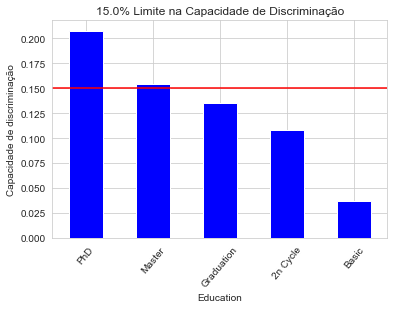

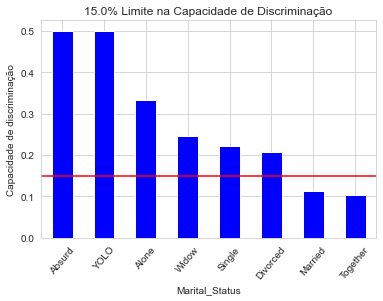

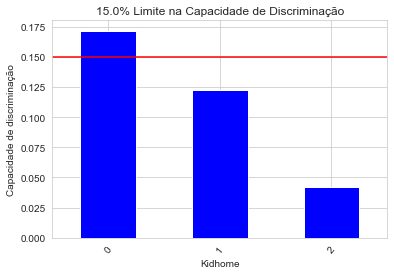

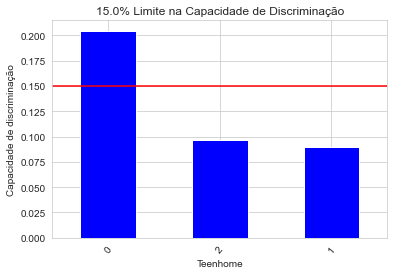

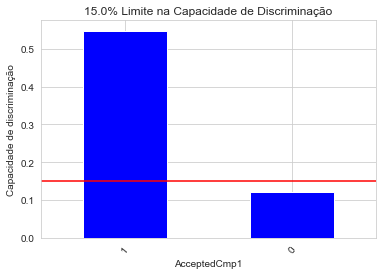

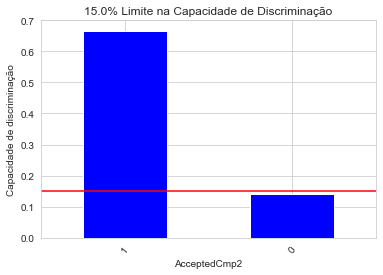

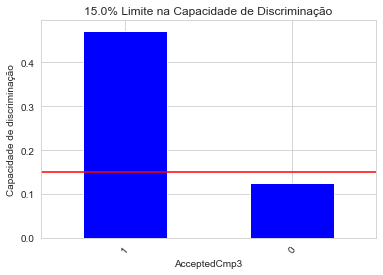

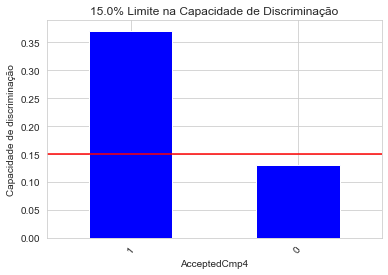

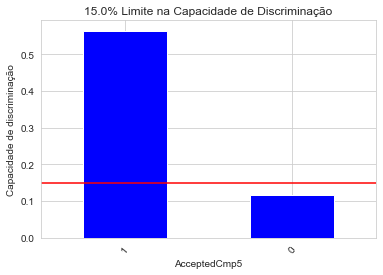

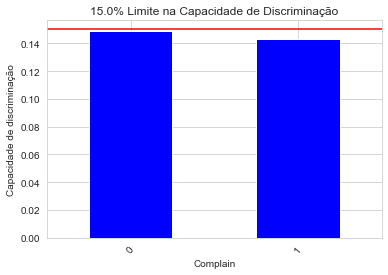

In [12]:
# Recebe um dataframe, lista de nomes de recursos categóricos (pode ser 1), o nome da variável de destino
# e o limite da capacidade de discriminação e gera todos os gráficos.

#Função recebe um dataframe, de nomes de recursos categóricos (pode ser 1), o nome da lista variável de destino
# e o limite da capacidade de discriminação e gera todos os gráficos.

def cat_feat_plot(df, fc, target, thresh):

    sns.set_style("whitegrid")

    if (type(fc)==str):
        plot_df = cat_feat_describe(df, fc, target, 50, thresh).iloc[:,1]

        plot_df = plot_df.sort_values(ascending=False)

        ax = plot_df.plot.bar(color="blue", title="{}% Linha Limite na Capacidade de Discriminação".format(thresh*100), legend=False)
        ax.set_ylabel("Capacidade de discriminação", size = 10)
        ax.axhline(y=thresh, color="red")
        ax.set_xticklabels(plot_df.index, rotation=50, size=10)


        plt.show()
        
        
        
    else:
        for feat in fc:
            plot_df = cat_feat_describe(df, feat, target, 50, thresh).iloc[:,1]

            plot_df = plot_df.sort_values(ascending=False)

            
            ax = plot_df.plot.bar(color="blue", title="{}% Limite na Capacidade de Discriminação".format(thresh*100), legend=False)
            ax.set_ylabel("Capacidade de discriminação", size = 10)
            ax.axhline(y=thresh, color="red")
            ax.set_xticklabels(plot_df.index, rotation=50, size=10)

            plt.show()
        
        
        
        
        
    
cat_feat_plot(train_data, feat_c, "Response", 0.15)

Podemos podemos analisar:

- $Education$: Doutorado e Mestre estão acima do limite de 15% de capacidade de discriminação.
- $Marital Status$: Apenas Casados e Juntos estão abaixo do limite.
- $KidHome$ & $TeenHome$: Apenas os clientes com zero filhos ou adolescentes apresentam alta capacidade de discriminação.
- $Accepted Campaign$: Todas as 5 campanhas anteriores mostram que, como esperado, os clientes que aceitaram as campanhas apresentam capacidade de discriminação acima do limite.
- $Complain$: Enquanto tanto quem registra quanto quem não registra apresentam alta capacidade de discriminação, apenas os que reclamaram apresentam capacidade de discriminação superior ao limite.

## MUDANÇA

In [13]:
data_ = train_data.copy()

low_discriminability_cat = ["Absurd", "Alone", "YOLO", "Married", "Together"]
data_['Marital_Status'].loc[data_['Marital_Status'].isin(low_discriminability_cat)] = 'Other'
data_.groupby("Marital_Status").count().index

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Index(['Divorced', 'Other', 'Single', 'Widow'], dtype='object', name='Marital_Status')

In [14]:
low_discriminability_cat = ["Graduation", "2n Cycle", "Basic"]
data_['Education'].loc[data_['Education'].isin(low_discriminability_cat)] = 'Other'

In [15]:
data_.groupby("Education").count().index

Index(['Master', 'Other', 'PhD'], dtype='object', name='Education')

In [16]:
data_['NumberOff'] = data_['Kidhome'] + data_['Teenhome']

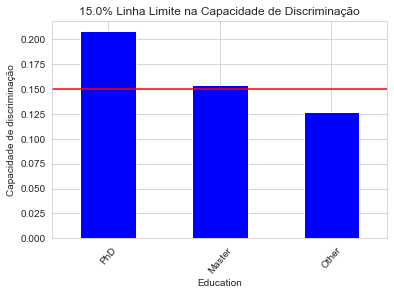

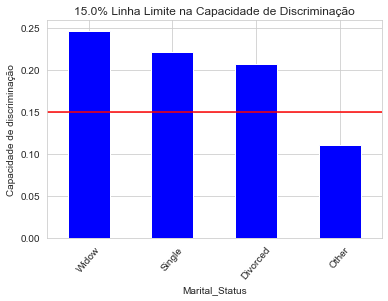

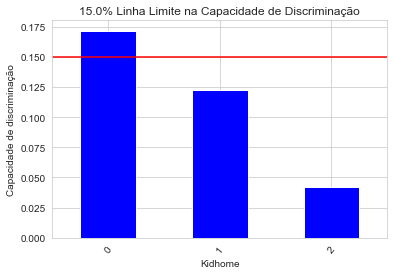

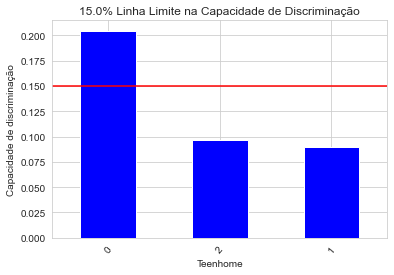

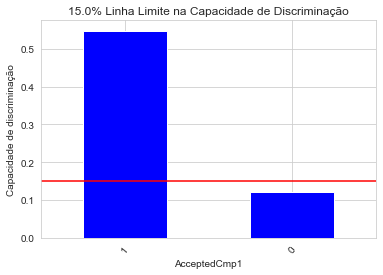

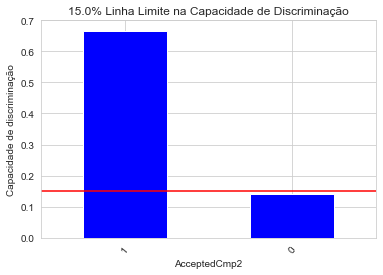

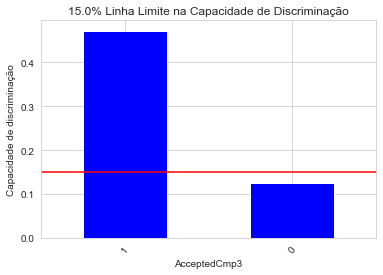

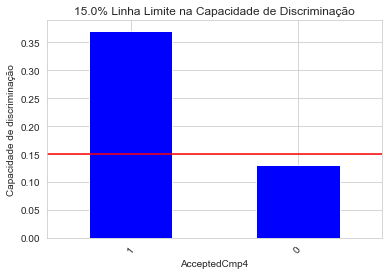

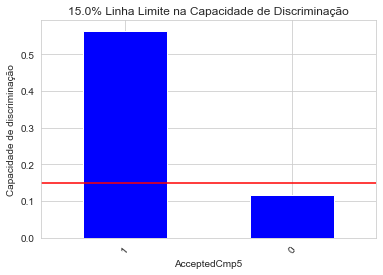

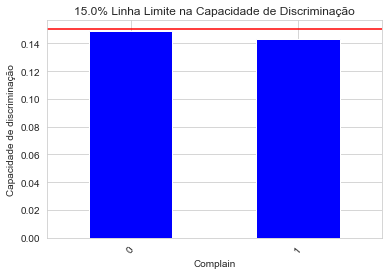

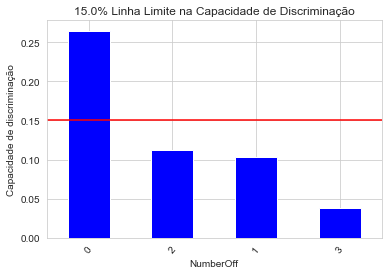

In [17]:
def cat_feat_plot(df, fc, target, thresh):

    sns.set_style("whitegrid")
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.2, wspace=0.4)
    i=1

    if (type(fc)==str):
        plot_df = cat_feat_describe(df, fc, target, 50, thresh).iloc[:,1]

        plot_df = plot_df.sort_values(ascending=False)

        ax = plot_df.plot.bar(color="blue", title="{}% Linha Limite na Capacidade de Discriminação".format(thresh*100), legend=False)
        ax.set_ylabel("Capacidade de discriminação", size = 10)
        ax.axhline(y=thresh, color="red")
        ax.set_xticklabels(plot_df.index, rotation=50, size=10)


        plt.show()
        
        
        
    else:
        for feat in fc:
            plot_df = cat_feat_describe(df, feat, target, 50, thresh).iloc[:,1]

            plot_df = plot_df.sort_values(ascending=False)

            
            ax = plot_df.plot.bar(color="blue", title="{}% Linha Limite na Capacidade de Discriminação".format(thresh*100), legend=False)
            ax.set_ylabel("Capacidade de discriminação", size = 10)
            ax.axhline(y=thresh, color="red")
            ax.set_xticklabels(plot_df.index, rotation=50, size=10)

            plt.show()
        
        
        
feat_c.append("NumberOff")
cat_feat_plot(data_, feat_c, "Response", 0.15)

In [18]:
low_discriminability_cat = ["1", "2"]
data_['Teenhome'].loc[data_['Teenhome'].isin(low_discriminability_cat)] = '1'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [19]:
low_discriminability_cat = ["1", "2"]
data_['Kidhome'].loc[data_['Kidhome'].isin(low_discriminability_cat)] = '1'

In [20]:
low_discriminability_cat = ["1", "2", "3"]
data_['NumberOff'].loc[data_['NumberOff'].isin(low_discriminability_cat)] = '1'

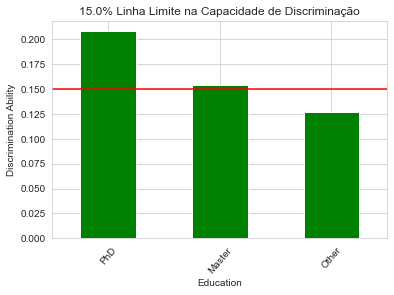

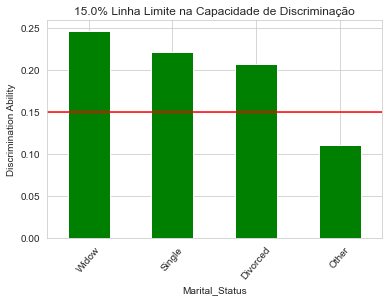

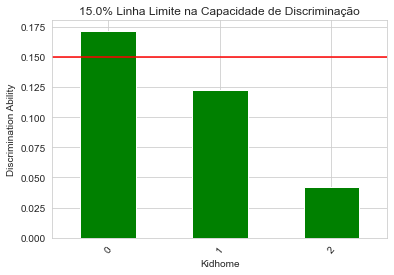

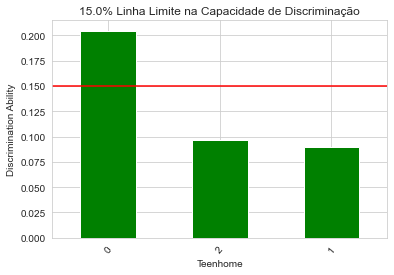

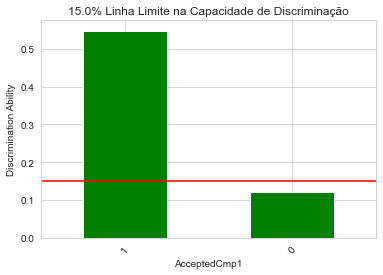

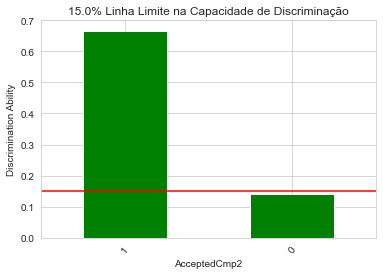

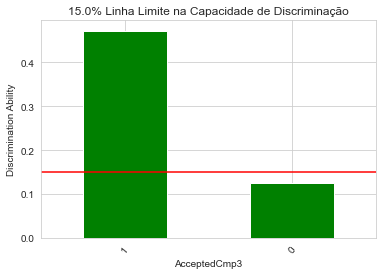

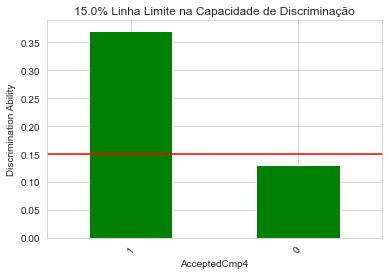

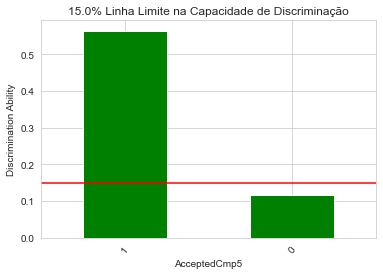

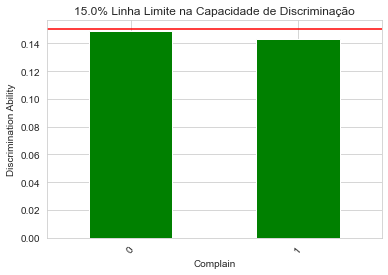

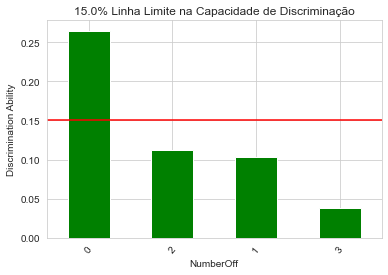

In [21]:
def cat_feat_plot(df, fc, target, thresh):

    sns.set_style("whitegrid")

    if (type(fc)==str):
        plot_df = cat_feat_describe(df, fc, target, 50, thresh).iloc[:,1]

        plot_df = plot_df.sort_values(ascending=False)

        ax = plot_df.plot.bar(color="green", title="{}% Linha Limite na Capacidade de Discriminação".format(thresh*100), legend=False)
        ax.set_ylabel("Discrimination Ability", size = 10)
        ax.axhline(y=thresh, color="red")
        ax.set_xticklabels(plot_df.index, rotation=50, size=10)


        plt.show()
        
        
        
    else:
        for feat in fc:
            plot_df = cat_feat_describe(df, feat, target, 50, thresh).iloc[:,1]

            plot_df = plot_df.sort_values(ascending=False)

            
            ax = plot_df.plot.bar(color="green", title="{}% Linha Limite na Capacidade de Discriminação".format(thresh*100), legend=False)
            ax.set_ylabel("Discrimination Ability", size = 10)
            ax.axhline(y=thresh, color="red")
            ax.set_xticklabels(plot_df.index, rotation=50, size=10)

            plt.show()
        

cat_feat_plot(data_, feat_c, "Response", 0.15)

## 1.3 Análise de Variáveis ​​Numéricas

### 1.3.1 Transformando  - Dt_Customer em dias

In [22]:
# Obtém uma série de datas e seu formato como parâmetros e retorna uma série de dias desde aquela data até hoje.



def days_since(dates_series, date_format):

    n = len(dates_series)
    
    result = [0] * n

    for i in range(n):
        result[i] = (datetime.today()-datetime.strptime(dates_series[i], date_format)).days
    
    return result







In [23]:
def days_since(dates_series, date_format):

    n = len(dates_series)
    
    result = [0] * n

    for i in range(n):
        result[i] = (datetime.today()-datetime.strptime(dates_series[i], date_format)).days
    
    return result



data_["Days_Customer"] = days_since(list(data_.Dt_Customer), "%Y-%m-%d")

data_ = data_.drop(columns="Dt_Customer")


In [24]:
data_["Days_Customer"].head()

0    3551
1    3001
2    3200
3    3027
4    3049
Name: Days_Customer, dtype: int64

In [25]:
feat_n = list(data_.columns)

feat_n = list(filter(lambda x: x not in feat_c, feat_n))

feat_n.remove("ID") # Removendo ID.
# List of Numerical Variables

data_[feat_n].describe() # Descreve atributos numéricos

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Response,Days_Customer
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,1968.805804,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,3.0,11.0,0.149107,3241.582143
std,11.984069,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.0,0.0,0.356274,202.122512
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2888.000000
25%,1959.000000,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0,0.000000,3068.750000
50%,1970.000000,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0,0.000000,3243.500000
75%,1977.000000,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0,0.000000,3417.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0,1.000000,3587.000000


### 1.3.2 Variáveis com variação zero (constantes)

In [26]:
std = data_[feat_n].describe().iloc[2,:]

const_lab = [std[std<0.05].index[0], std[std<0.05].index[1]]

std[std<0.05]

Z_CostContact    0.0
Z_Revenue        0.0
Name: std, dtype: float64

#### Removendo variáveis ​​constantes

In [27]:
# Agora data não contém variáveis de variação zero.
data_.drop(labels=const_lab, axis=1, inplace=True) 

# Removendo os nomes das variáveis sem variação
                                                       
feat_n = list(filter(lambda x: x not in const_lab, feat_n))  

In [28]:
data_.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,NumberOff,Days_Customer
0,5524,1957,Other,Single,58138.0,0,0,58,635,88,...,7,0,0,0,0,0,0,1,0,3551
1,2174,1954,Other,Single,46344.0,1,1,38,11,1,...,5,0,0,0,0,0,0,0,2,3001
2,4141,1965,Other,Other,71613.0,0,0,26,426,49,...,4,0,0,0,0,0,0,0,0,3200
3,6182,1984,Other,Other,26646.0,1,0,26,11,4,...,6,0,0,0,0,0,0,0,1,3027
4,5324,1981,PhD,Other,58293.0,1,0,94,173,43,...,5,0,0,0,0,0,0,0,1,3049


### 1.3.3 Inserindo valores ausentes
Em vez de uma simples entrada média, empregamos o modelo de Regressão Linear do pacote sklearn para realizar uma previsão de quais seriam os valores ausentes em Renda considerando todas as outras variáveis ​​e usá-lo para inserir os valores ausentes.

In [29]:
# Preparing all datasets to be used in the Linear Regression Model
# Preparing all datasets to be used in the Linear Regression Model
X = data_
y = X["Income"]
y = y[-y.isna()]

X = X.drop(columns=["ID"])


X["Marital_Status"] = pd.Categorical(X["Marital_Status"])
X["Marital_Status"] = X["Marital_Status"].cat.codes

X["Education"] = pd.Categorical(X["Education"])
X["Education"] = X["Education"].cat.codes

x_pred = X[X.Income.isna()]
x_pred = x_pred.drop(columns="Income")

X = X[-X.Income.isna()]
X = X.drop(columns="Income")






In [30]:

# Linear Regression Model
reg = LinearRegression().fit(X, y)

# Predictions
y_pred = reg.predict(x_pred)

# Store the predictions in the missing values
data_.loc[data_.Income.isna(), "Income"] = y_pred

In [31]:
missing_rep(data_) # No more missings!

,Ausentes,Proporção dos Ausentes,Mais Alto que 3%


# MUDANÇA

Remove a idade inconsistente

In [32]:
data_[(2019 - data_["Year_Birth"])>=90]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,NumberOff,Days_Customer
192,7829,1900,Other,Divorced,36640.0,1,0,99,15,6,...,5,0,0,0,0,0,1,0,1,3164
239,11004,1893,Other,Single,60182.0,0,1,23,8,0,...,4,0,0,0,0,0,0,0,1,2931
339,1150,1899,PhD,Other,83532.0,0,0,36,755,144,...,1,0,0,1,0,0,0,0,0,3164


In [33]:
# Preparando todos os conjuntos de dados a serem usados ​​no Modelo de Regressão Linear
X = data_
y = X[(2019 - X["Year_Birth"])<90].Year_Birth
X = X.drop(columns=["ID"])

X["Marital_Status"] = pd.Categorical(X["Marital_Status"])
X["Marital_Status"] = X["Marital_Status"].cat.codes

X["Education"] = pd.Categorical(X["Education"])
X["Education"] = X["Education"].cat.codes

x_pred = X[(2019 - X["Year_Birth"])>=90]
x_pred = x_pred.drop(columns="Year_Birth")

X = X[(2019 - X["Year_Birth"])<90]
X = X.drop(columns="Year_Birth")





# Linear Regression Model
reg = LinearRegression().fit(X, y)

# Predictions
y_pred = reg.predict(x_pred)

# Store the predictions in the missing values
data_.loc[(2019 - data_["Year_Birth"])>=90, "Year_Birth"] = y_pred.round()
data_["Year_Birth"].astype('int')

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2240, dtype: int32

### 1.3.4 Matriz de Correlação entre variáveis ​​numéricas


Empregamos aqui a matriz de correlação para encontrar variáveis ​​que apresentem alta correlação entre elas para que possamos eliminar uma ou juntá-las.

In [34]:
# The function to "zoom" in the correlation matrix.
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "10pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])]



# Takes a dataframe and returns the correlation matrix while plotting the correlation matrix plot using hues of blue and red.
def corr_matrix(df):
    # Compute the correlation matrix
    corr = df.corr()

    cmap = sns.diverging_palette(5, 250, as_cmap=True)


    vis = corr.style.background_gradient(cmap, axis=1)\
            .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
            .set_caption("Hover to magify")\
            .set_precision(2)\
            .set_table_styles(magnify())

    return vis



feat_n_ = feat_n.copy()
feat_n.remove("Response") # Removing the Targer variable from the list of numerical features to be analyzed by correlation.
corr_matrix(data_[feat_n])

C:\Users\CELIOF~1\AppData\Local\Temp/ipykernel_15180/1772649121.py:23: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  vis = corr.style.background_gradient(cmap, axis=1)\


,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days_Customer
Year_Birth,1.00,-0.16,-0.02,-0.16,-0.01,-0.03,-0.04,-0.02,-0.06,-0.07,-0.15,-0.13,-0.14,0.12,0.02
Income,-0.16,1.00,-0.00,0.58,0.43,0.58,0.44,0.44,0.33,-0.08,0.39,0.59,0.53,-0.55,-0.02
Recency,-0.02,-0.00,1.00,0.02,-0.00,0.02,0.00,0.02,0.02,-0.00,-0.01,0.03,0.00,-0.02,0.02
MntWines,-0.16,0.58,0.02,1.00,0.39,0.56,0.40,0.39,0.39,0.01,0.54,0.64,0.64,-0.32,0.17
MntFruits,-0.01,0.43,-0.00,0.39,1.00,0.54,0.59,0.57,0.39,-0.13,0.30,0.49,0.46,-0.42,0.07
MntMeatProducts,-0.03,0.58,0.02,0.56,0.54,1.00,0.57,0.52,0.35,-0.12,0.29,0.72,0.48,-0.54,0.09
MntFishProducts,-0.04,0.44,0.00,0.40,0.59,0.57,1.00,0.58,0.42,-0.14,0.29,0.53,0.46,-0.45,0.08
MntSweetProducts,-0.02,0.44,0.02,0.39,0.57,0.52,0.58,1.00,0.37,-0.12,0.35,0.49,0.45,-0.42,0.08
MntGoldProds,-0.06,0.33,0.02,0.39,0.39,0.35,0.42,0.37,1.00,0.05,0.42,0.44,0.38,-0.25,0.16
NumDealsPurchases,-0.07,-0.08,-0.00,0.01,-0.13,-0.12,-0.14,-0.12,0.05,1.00,0.23,-0.01,0.07,0.35,0.22


C:\Users\CELIOF~1\AppData\Local\Temp/ipykernel_15180/2439591611.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


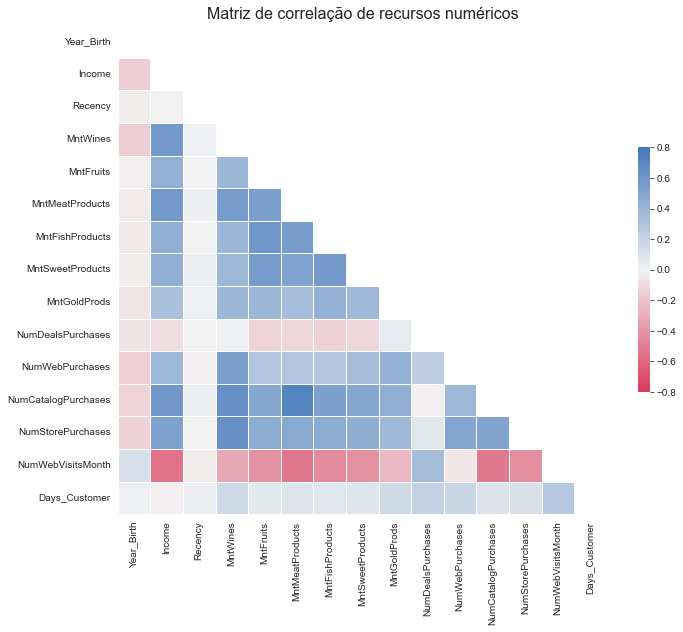

In [35]:
corr = data_[feat_n].corr()
# Gera uma máscara para o triângulo superior
mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure(figsize=(11,9))

cmap = sns.diverging_palette(5, 250, as_cmap=True)

# Desenhe o mapa de calor com a máscara e a proporção correta
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, vmin=-.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Matriz de correlação de recursos numéricos", fontsize=16)
plt.show()

In [36]:
# Função para encontrar o valor máximo em uma matriz de correlação e imprimir a linha e a coluna em que está localizada.
def max_matrix(matrix):

    aux = 0
    line = ""
    col = ""
    for l in matrix:
        for i in matrix:
            if ((matrix[l][i]<1) & (abs(matrix[l][i])>abs(aux))):
                aux = matrix[l][i]
                line = l
                col = i


    print("Max Value:", aux,
          "\nLine:", line,
          "\nColumn:", col)


    return aux


max_matrix(data_[feat_n_].corr())

Max Value: 0.7238265908738767 
Line: MntMeatProducts 
Column: NumCatalogPurchases


0.7238265908738767

A maior correlação que temos é entre o número de Produtos de Carne adquiridos e o número de Compras do Catálogo (0,72).

Devemos fazer algo a respeito?

A maior recomendação do Catálogo é entre o número de Produtos de Carne adquiridos e o número de Compras do Catálogo (0,72).

devemos fazer algo a respeito?

### 1.3.5 Visualização de Variáveis Numéricas

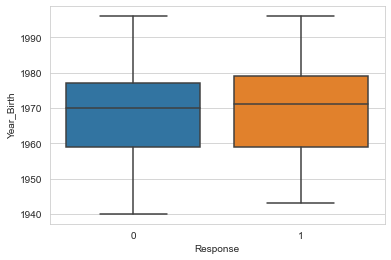

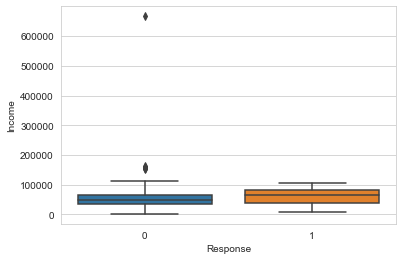

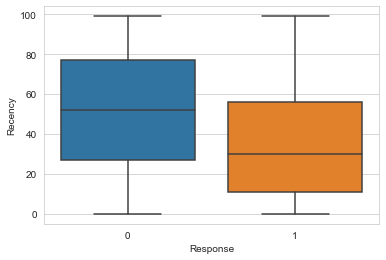

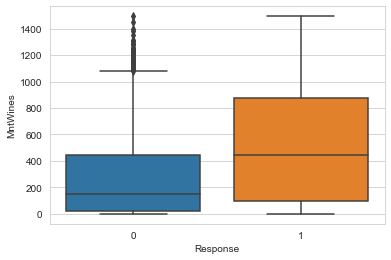

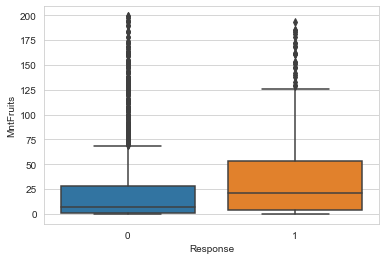

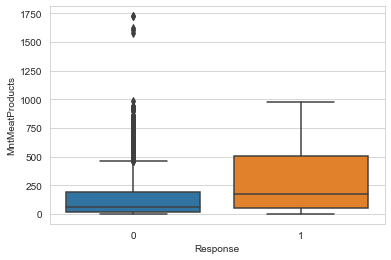

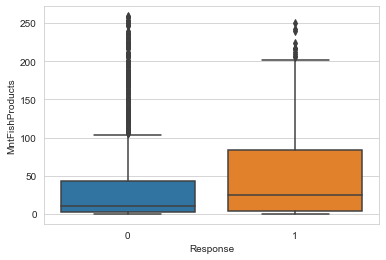

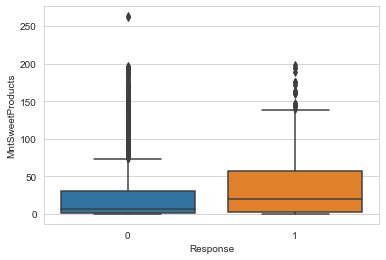

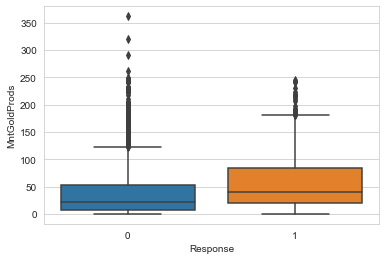

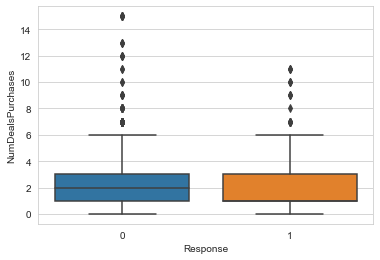

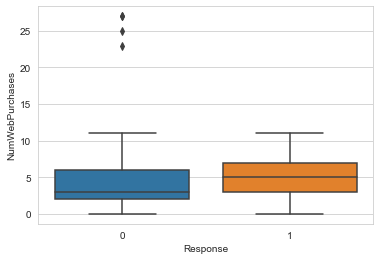

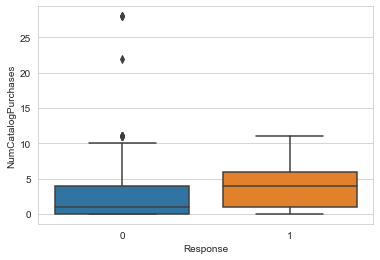

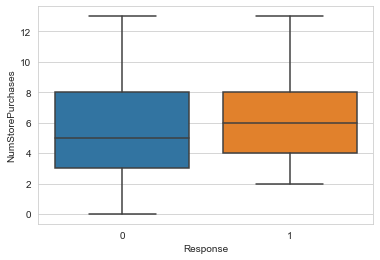

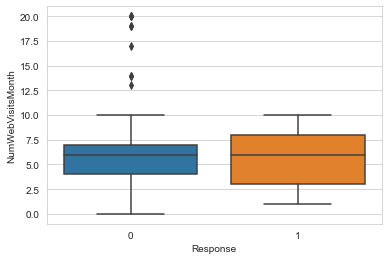

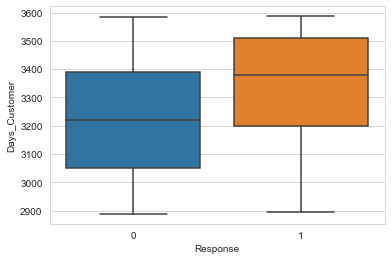

In [37]:
# Pode dar de 1 a todos os recursos numéricos um feat_n.
# Pode fornecer um recurso categórico a ser usado (opcional).





def num_feat_plot(df, feat_nlist, target, feat_clist = None):
    
    if(target in feat_nlist):
        feat_nl = feat_nlist.copy()
        feat_nl.remove(target)
    
    if (feat_clist==None):
        
        if (type(feat_nl)==str):
            
            sns.boxplot(data = df, y = feat_nl, x = target    )
            plt.show()
            
            
        else:
            for feat in feat_nl:
                sns.boxplot(data = df, y = feat, x = target)
                plt.show()
        
    else:
        if (type(feat_nl)==str):
            
            sns.boxplot(data = data_, y = feat_nl, x = feat_clist, hue = target)
            plt.show()
            
            
        else:
            for feat in feat_nl:
                sns.boxplot(data = data_, y = feat, x = feat_clist, hue = target)
                plt.show()
                
    return

num_feat_plot(data_, feat_n_, "Response")

É claro que Renda possui muitos valores discrepantes altos, enquanto Ano_Nascimento possui valores discrepantes baixos. 
Algumas das variáveis de número de compras também apresentam altos valores discrepantes.

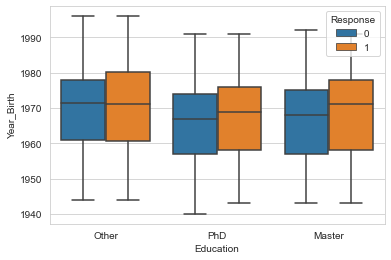

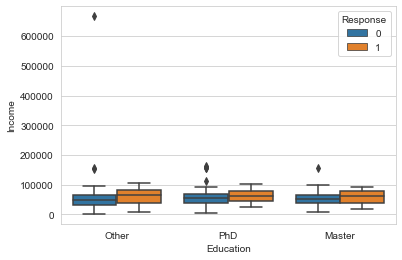

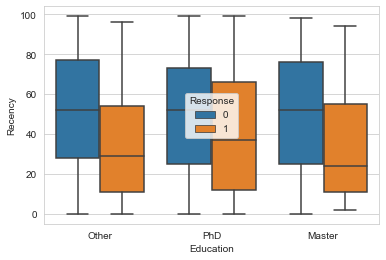

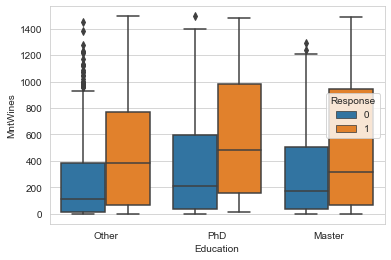

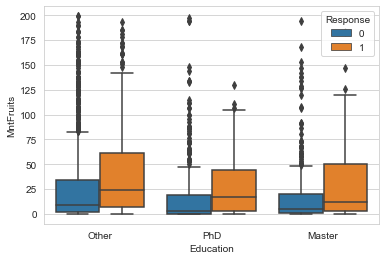

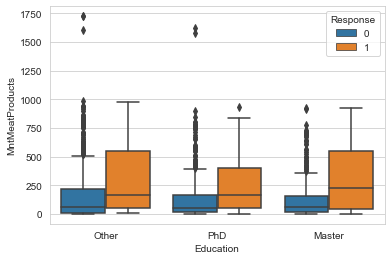

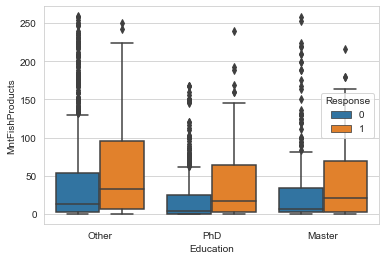

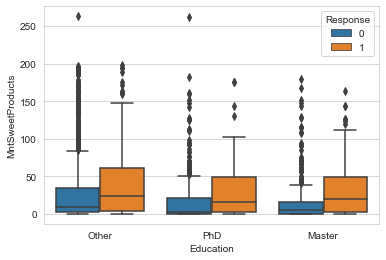

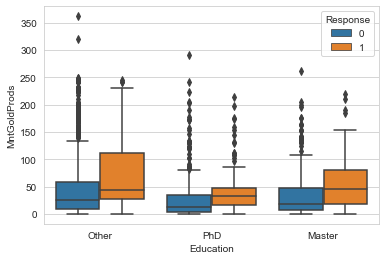

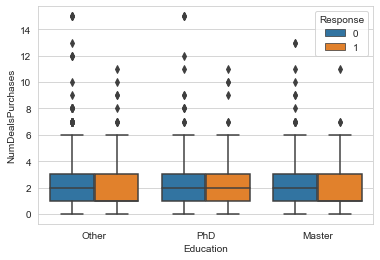

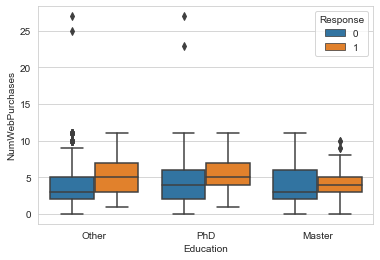

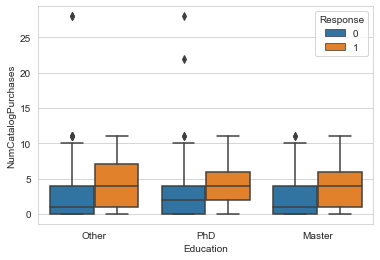

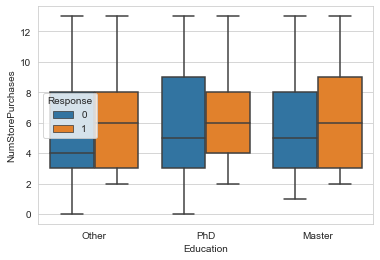

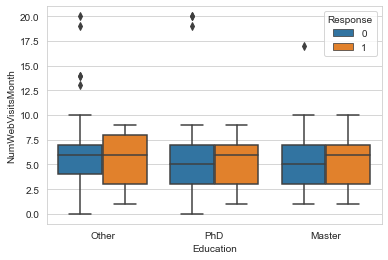

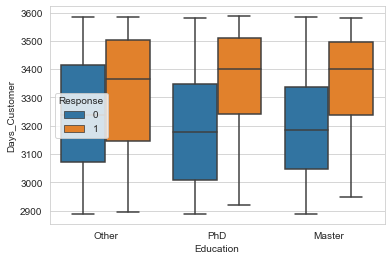

In [38]:
num_feat_plot(data_, feat_n_, "Response", "Education")

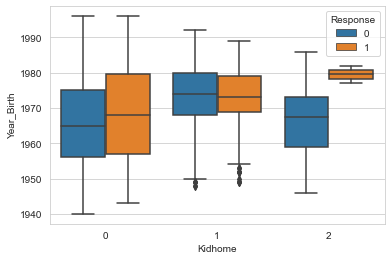

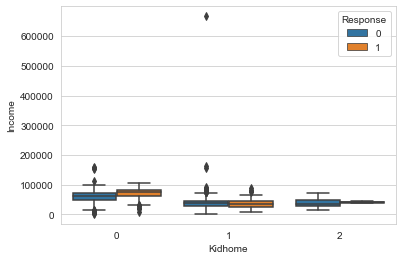

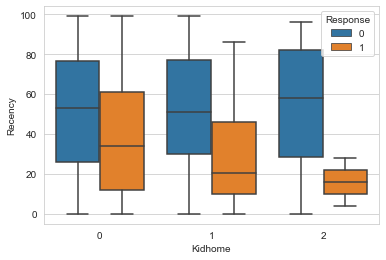

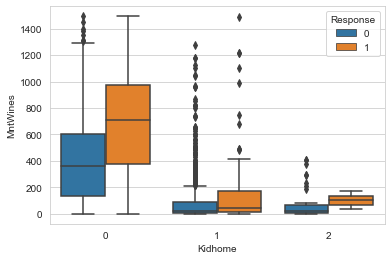

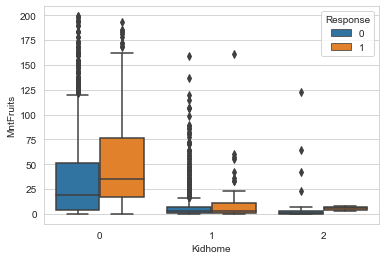

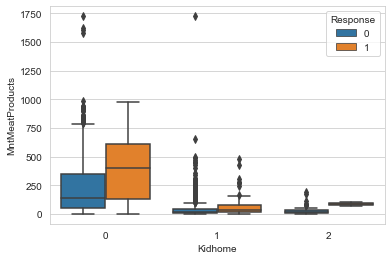

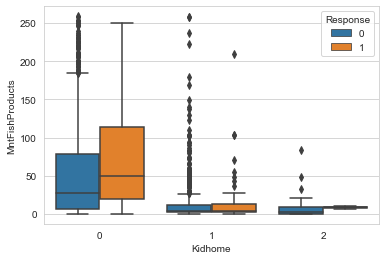

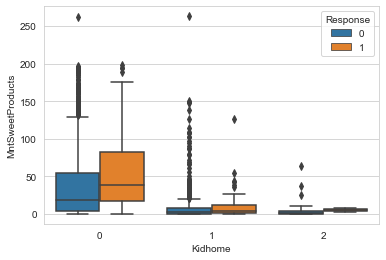

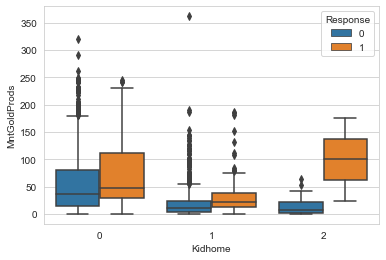

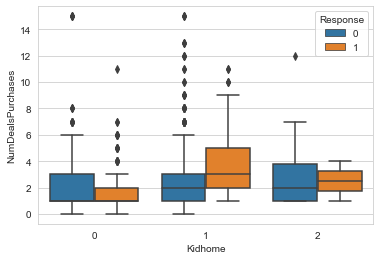

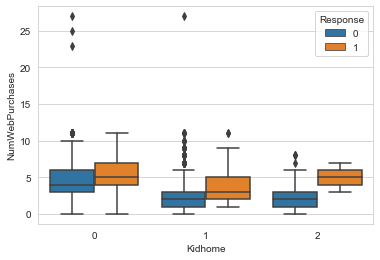

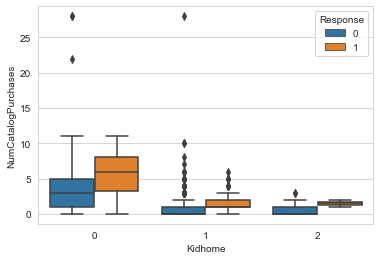

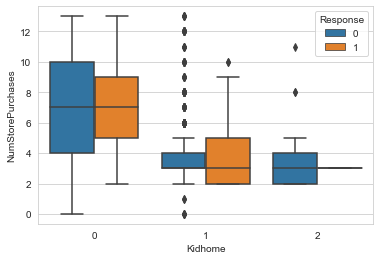

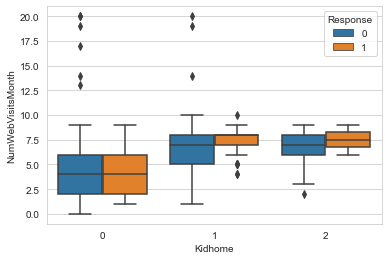

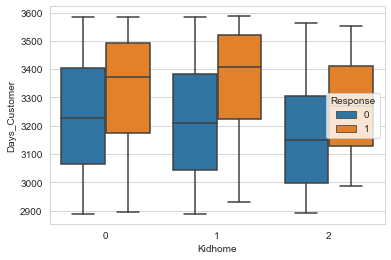

In [39]:
num_feat_plot(data_, feat_n_, "Response", "Kidhome")

## 1.4 Detecção de valores discrepantes

### 1.4.1 Valores atípicos univariados

#### Cortes de desvio padrão

Primeiro, usaremos o Desvio Padrão para encontrar outliers univariados em recursos numéricos. Toda observação acima de 3 desvios padrão de sua própria distribuição será considerada um outlier.


In [40]:
# Function that is given a series and returns a list of same size indicating with boolean the outliers.
# 3 Standard Deviations is the default cutoff.
def filter_by_std(series_, n_stdev=3.0, return_thresholds=False):
    mean_, stdev_ = series_.mean(), series_.std()
    cutoff = stdev_ * n_stdev
    lower_bound, upper_bound = mean_ - cutoff, mean_ + cutoff
    if return_thresholds:
        return lower_bound, upper_bound
    else:
        return [True if i < lower_bound or i > upper_bound else False for i in series_]

    
# Function that is given a series and returns a list of same size indicating with boolean the outliers.
# 1.5 Interquartile Range is the default cutoff.
def filter_by_iqr(series_, k=1.5, return_thresholds=False):
    q25, q75 = np.percentile(series_, 25), np.percentile(series_, 75)
    iqr = q75-q25
    
    cutoff = iqr*k
    lower_bound, upper_bound = q25-cutoff, q75+cutoff
    
    if return_thresholds:
        return lower_bound, upper_bound
    else:
        return [True if i < lower_bound or i > upper_bound else False for i in series_]

In [41]:
outliers = pd.DataFrame()

for feat in feat_n:
    outliers = outliers.append(data_[filter_by_std(data_[feat], n_stdev=3)])
    

outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,NumberOff,Days_Customer
164,8475,1973.0,PhD,Other,157243.0,0,1,98,20,2,...,0,0,0,0,0,0,0,0,1,3008
617,1503,1976.0,PhD,Other,162397.0,1,1,31,85,1,...,1,0,0,0,0,0,0,0,2,3279
655,5555,1975.0,Other,Divorced,153924.0,0,0,81,1,1,...,0,0,0,0,0,0,0,0,0,3030
687,1501,1982.0,PhD,Other,160803.0,0,0,21,55,16,...,0,0,0,0,0,0,0,0,0,3582
1300,5336,1971.0,Master,Other,157733.0,1,0,37,39,1,...,1,0,0,0,0,0,0,0,1,3278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,6862,1971.0,Other,Divorced,1730.0,0,0,65,1,1,...,20,0,0,0,0,0,0,0,0,2930
1328,4246,1982.0,Master,Single,6560.0,0,0,2,67,11,...,17,0,0,0,0,0,0,0,0,3087
1524,11110,1973.0,Other,Single,3502.0,1,0,56,2,1,...,14,0,0,0,0,0,0,0,1,3330
1846,9931,1963.0,PhD,Other,4023.0,1,1,29,5,0,...,19,0,0,0,0,0,0,0,2,2894


#### Detecção de anomalias com floresta de isolamento

Através do uso do algoritmo Isolation Forest, do scikitlearn, podemos calcular o escore de anomalia de cada ponto das feições numéricas e, então, buscar outliers.

As áreas vermelhas indicam onde a probabilidade de existirem observações é baixa. A linha azul, representando o escore da anomalia, tende a ser semelhante à distribuição da variável.

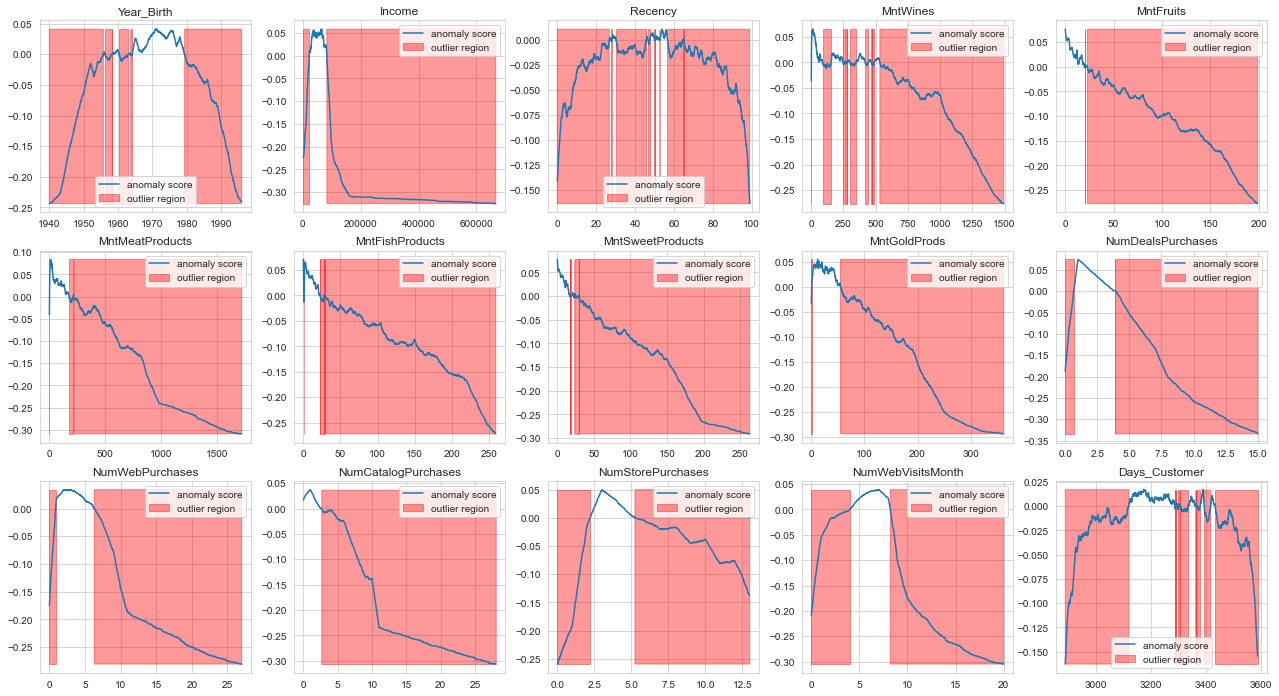

In [42]:
# Função que recebe como parâmetros um dataframe, lista de nomes de features numéricas, número de linhas e colunas de
# o multiplot resultante e plota os gráficos de anomalia de todos os recursos numéricos.

def anom_plot(df, num_feat_list, l, c):
    fig, axs = plt.subplots(l, c, figsize=(22, 12), facecolor='w', edgecolor='k')
    axs = axs.ravel()
    
    for i, column in enumerate(num_feat_list):
        isolation_forest = IsolationForest(n_estimators=500,  contamination="auto")
        isolation_forest.fit(df[column].values.reshape(-1,1))

        xx = np.linspace(df[column].min(), df[column].max(), len(df)).reshape(-1,1)
        anomaly_score = isolation_forest.decision_function(xx)
        outlier = isolation_forest.predict(xx)
    
        axs[i].plot(xx, anomaly_score, label='anomaly score')
        axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
        axs[i].legend()
        axs[i].set_title(column)
      
    return
    
anom_plot(data_, feat_n, 3, 5)

A célula a seguir define duas funções utilitárias para identificar discrepantes semiautomaticamente, por meio de perspectiva univariada, em um pandas.Series usando o desvio padrão da média (filter_by_std) e intervalo interquartil (filter_by_iqr).

In [43]:
def filter_by_iqr(series_, k=1.5, return_thresholds=False):
    q25, q75 = np.percentile(series_, 25), np.percentile(series_, 75)
    iqr = q75-q25
    
    cutoff = iqr*k
    lower_bound, upper_bound = q25-cutoff, q75+cutoff
    
    if return_thresholds:
        return lower_bound, upper_bound
    else:
        return [True if i < lower_bound or i > upper_bound else False for i in series_]

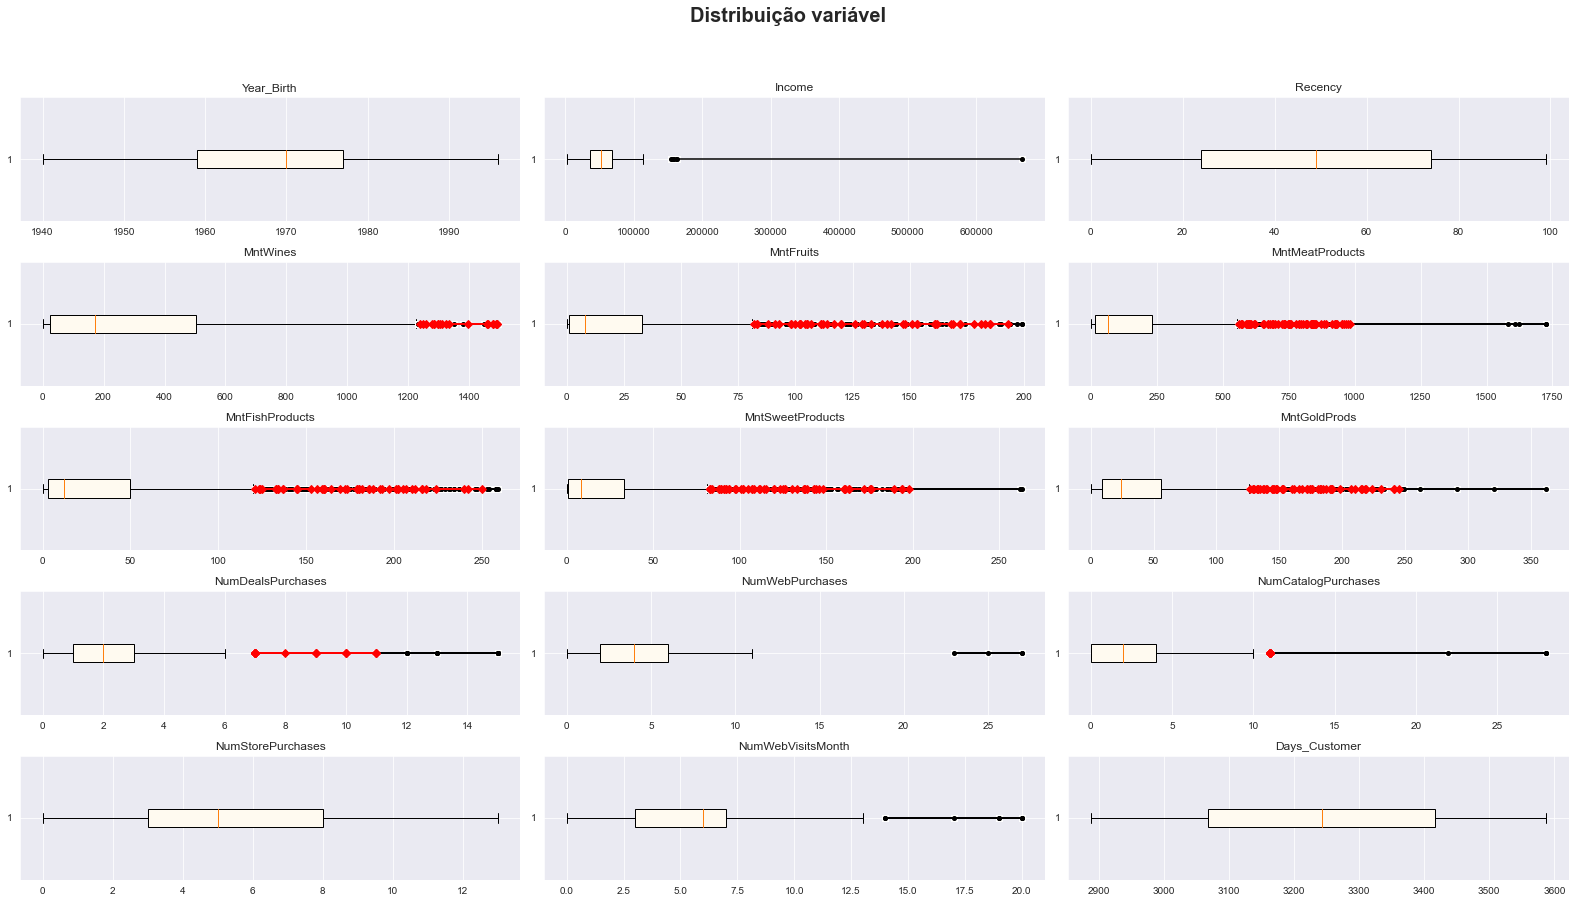

In [44]:
from sklearn.preprocessing import KBinsDiscretizer

def bivariate_outlier_id_plot(df, list_num_features, target, n_bins=20):
    sns.set_style("darkgrid") 
    fig = plt.figure(figsize=(22, 12))
    color = "floralwhite"
    i=1
    for feature in list_num_features:
        if feature == "Income":
            ser = df[feature].copy()
            ser.dropna(inplace=True)
        else:
            ser = df[feature]
          
        # box plots
        thresholds = filter_by_iqr(ser, 1.5, True)
        outliers = df[[feature, target]][df[feature]>thresholds[1]]

        ax = fig.add_subplot(5, 3, i)

        box = ax.boxplot(ser, flierprops=dict(markerfacecolor='r', marker='s'), 
                         vert=False, patch_artist=True, sym="w")                                                                  
        ax.plot(outliers.iloc[:, 0][outliers.iloc[:, 1]==0], np.ones(sum(outliers.iloc[:, 1]==0)), color="black", marker = "o", markersize=4)
        ax.plot(outliers.iloc[:, 0][outliers.iloc[:, 1]==1], np.ones(sum(outliers.iloc[:, 1]==1)), color="red", marker = "D", markersize=6)
        ax.set_title(feature)
        box['boxes'][0].set_facecolor(color)

        i+=1
        
    fig.suptitle('Distribuição variável',  ha='center',
                     va='center', fontsize=20, y=1.03, fontweight='bold')

    plt.tight_layout()
    plt.show()

bivariate_outlier_id_plot(data_, feat_n, "Response", n_bins=20)

<h1> Conjunto de dados dividido</h1>

### 1.4.2 Valores atípicos multivariados
#### Distância de Mahalanobis
A distância euclidiana é conhecida por não encontrar outliers ao lidar com dados multidimensionais. Então usamos a Distância de Mahalanobis, pois, como ela usa os autovalores das variáveis ​​em vez do eixo original, pode fazer algo semelhante a um dimensionamento de recursos.

Basicamente calcula a distância de cada ponto ao centro de massa medido em desvios padrão através da matriz de covariância invertida.

Detecção de valores discrepantes multivariados



In [45]:
# Função simples para verificar se a matriz é definida positiva (por exemplo, retornará False se a matriz contiver NaN).
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False 

    
    
    
    
    
# A função para calcular a distância Mahalanobis. Retorna uma lista de distâncias.
def MahalanobisDist(data):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            vars_mean = []
            for i in range(data.shape[0]):
                vars_mean.append(list(data.mean(axis=0)))
            diff = data - vars_mean
            md = []
            for i in range(len(diff)):
                md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
            return md
        else:
            print("Erro: Inversa da Matriz de Covariância não é definida positiva!")
    else:
        print("Erro: Matriz de Covariância não é definida positiva!")

        
        
        
        
# Função para detectar outliers multivariados das Distâncias de Mahalanobis. Retorna uma matriz de índices dos valores discrepantes.    
def MD_detectOutliers(data, extreme=False):
    MD = MahalanobisDist(data)

    std = np.std(MD)
    k = 3. * std if extreme else 2. * std
    m = np.mean(MD)
    up_t = m + k
    low_t = m - k
    outliers = []
    for i in range(len(MD)):
        if (MD[i] >= up_t) or (MD[i] <= low_t):
            outliers.append(i)  # index of the outlier
    return np.array(outliers)


In [46]:
# Here we are creating an auxiliar dataframe and inputing NaN with the mean so we can calculate the Mahalanobis Distances.
data_aux = data_[feat_n_]

data_aux = data_aux.apply(lambda x: x.fillna(x.mean()), axis=0)

In [47]:
# Run the function
outliers_i = MD_detectOutliers(np.array(data_aux))
len(outliers_i)


41

In [48]:
outliers = pd.DataFrame()
for i in outliers_i:
    outliers = outliers.append(data_aux.iloc[i,:])
    
outliers.head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Days_Customer
9,1950.0,5648.000000,68.0,28.0,0.0,6.0,1.0,1.0,13.0,1.0,1.0,0.0,0.0,20.0,0.0,2996.0
21,1979.0,2447.000000,42.0,1.0,1.0,1725.0,1.0,1.0,1.0,15.0,0.0,28.0,0.0,1.0,0.0,3427.0
27,1986.0,80522.254799,19.0,5.0,1.0,3.0,3.0,263.0,362.0,0.0,27.0,0.0,0.0,1.0,0.0,3382.0
67,1979.0,88194.000000,19.0,688.0,14.0,309.0,201.0,24.0,38.0,1.0,11.0,10.0,10.0,5.0,1.0,2990.0
109,1960.0,89058.000000,18.0,454.0,194.0,106.0,31.0,22.0,43.0,1.0,5.0,4.0,4.0,2.0,0.0,3457.0


Essas observações foram detectadas como outliers multivariados pelo método Mahalanobis Distance.

Poderíamos simplesmente remover essas linhas do conjunto de dados, pois apenas 33 observações discrepantes foram detectadas.

O que deveríamos fazer?

In [49]:
# Rows which were detected as multivariate outliers:
dat = pd.DataFrame()
for i in outliers_i:
    dat = dat.append(data_aux.iloc[i,:])
    
dat

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Days_Customer
9,1950.0,5648.000000,68.0,28.0,0.0,6.0,1.0,1.0,13.0,1.0,1.0,0.0,0.0,20.0,0.0,2996.0
21,1979.0,2447.000000,42.0,1.0,1.0,1725.0,1.0,1.0,1.0,15.0,0.0,28.0,0.0,1.0,0.0,3427.0
27,1986.0,80522.254799,19.0,5.0,1.0,3.0,3.0,263.0,362.0,0.0,27.0,0.0,0.0,1.0,0.0,3382.0
67,1979.0,88194.000000,19.0,688.0,14.0,309.0,201.0,24.0,38.0,1.0,11.0,10.0,10.0,5.0,1.0,2990.0
109,1960.0,89058.000000,18.0,454.0,194.0,106.0,31.0,22.0,43.0,1.0,5.0,4.0,4.0,2.0,0.0,3457.0
164,1973.0,157243.000000,98.0,20.0,2.0,1582.0,1.0,2.0,1.0,15.0,0.0,22.0,0.0,0.0,0.0,3008.0
252,1974.0,102692.000000,5.0,168.0,148.0,444.0,32.0,172.0,148.0,1.0,6.0,9.0,13.0,2.0,1.0,3338.0
287,1956.0,50898.000000,88.0,285.0,28.0,242.0,55.0,114.0,135.0,13.0,6.0,2.0,12.0,5.0,0.0,3425.0
432,1967.0,67309.000000,76.0,515.0,47.0,181.0,149.0,95.0,95.0,15.0,9.0,6.0,9.0,7.0,0.0,3410.0
528,1964.0,61839.000000,20.0,1000.0,155.0,379.0,224.0,17.0,120.0,1.0,4.0,8.0,4.0,8.0,0.0,3574.0


## 2. Meios de classificação do valor dos recursos

Precisamos de meios de raking o valor dos recursos para que possamos compará-los e verificar quais são os melhores para alimentá-los como entrada para o pipeline. Para fazer isso, queremos um algoritmo que possa nos dar alguma medida da capacidade de discriminação de todos os recursos em relação ao nosso recurso de resposta.

Depois de ter uma ferramenta para medir o valor, podemos ir em frente e criar novos recursos e compará-los com os que já temos.

### 2.1 O teste de independência $\chi ^2$

O teste de independência $\chi ^2$, apesar de ter a hipótese nula de independência de variáveis, também pode medir o grau de associação entre duas variáveis, o que significa que podemos usá-lo para verificar qual característica é semelhante à nossa variável Response.

Para utilizar como entrada do teste um recurso numérico, foi empregada a estratégia de binning com 10 bins.

In [50]:
# É dado como entrada um dataframe, uma lista de nomes de features contínuas, uma lista de nomes de features categóricas,
# o nome do recurso de destino e retorna um dataframe com a capacidade de discriminação de cada recurso e se
# seu valor p é menor que 0,05.
# 10 é o número padrão de bins e uniforme é a estratégia utilizada no binning de recursos contínuas.

def chisq_ranker(df, continuous_flist, categorical_flist, target, n_bins=10, binning_strategy="uniform"):
    chisq_dict = {}
    if  continuous_flist:
        bindisc = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', 
                               strategy=binning_strategy)
        for feature in continuous_flist:            
            feature_bin = bindisc.fit_transform(df[feature].values[:, np.newaxis])
            feature_bin = pd.Series(feature_bin[:, 0], index=df.index)
            cont_tab = pd.crosstab(feature_bin, df[target], margins = False)
            chisq_dict[feature] = stats.chi2_contingency(cont_tab.values)[0:2] 
    if  categorical_flist:
        for feature in categorical_flist:  
            cont_tab = pd.crosstab(df[feature], df[target], margins = False)          
            chisq_dict[feature] = stats.chi2_contingency(cont_tab.values)[0:2]       
    
    df_chi = pd.DataFrame(chisq_dict, index=["Chi-Squared", "p-value"]).transpose()
    df_chi.sort_values("Chi-Squared", ascending=False, inplace=True)
    df_chi["valid"]=df_chi["p-value"]<=0.05
    
    
    return df_chi

Agora podemos verificar a similaridade de cada característica com a Resposta, o que, por sua vez, significa que podemos verificar a capacidade de discriminação de nossas características.

Na tabela podemos observar que, de acordo com o teste, o recurso AcceptedCmp1 apresenta a maior capacidade de discriminação, seguido do recurso AcceptedCmp5.

In [51]:
chisq_ranker(data_, feat_n, feat_c, "Response")


,Chi-Squared,p-value,valid
AcceptedCmp5,235.467749,3.828045e-53,True
AcceptedCmp1,190.241783,2.815498e-43,True
MntWines,169.732680,7.014771e-32,True
AcceptedCmp3,142.074884,9.364996e-33,True
MntMeatProducts,137.985390,2.666965e-27,True
NumCatalogPurchases,112.658836,1.123115e-22,True
Recency,105.568964,1.170347e-18,True
Days_Customer,97.837068,4.305265e-17,True
NumberOff,96.286339,9.769035e-21,True
Income,87.217082,8.673384e-19,True


### 2.2 Algoritmo de árvore de decisão para medir o valor do recurso
Mesmo que o propósito de um DTA não seja exatamente medir o valor dos recursos, podemos usá-lo dessa maneira. Ao empregar o DecisionTreeClassifier do scikit-learn, podemos extrair as importâncias dos recursos da classe.

In [52]:
# Função que recebe um dataframe, lista de nomes de recursos, nome do destino e parâmetros DecisionTreeClassifier e
# retorna um df com todos os recursos com valor maior que zero e o plota.

def dta_feat_worth(df, feat_list, target, max_depth, min_samples_split, min_samples_leaf, seed):
    
    # Preparing the Input Data for the DTA
    X = data_.loc[:, feat_list].values
    y = data_[target].values
    
    
    # Run the estimation through DecisionTreeClassifier
    dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_split=50, 
                                   min_samples_leaf = 20, random_state=seed)
    # Fits the DTClassifier with our data
    dtree = dtree.fit(X, y)
    
    
    # Create a dictionary with the name of all features and its importances according to the DTA estimation
    fi = dict(zip(columns, dtree.feature_importances_))
    # Then creates a Dataframe with it
    fidf = pd.DataFrame(fi, index=["worth"])
    # Transpose it because the way it is created it is on the other orientation
    fidf_t = fidf.transpose().sort_values(by="worth", ascending=False)
     # Removes features with worth 0 and puts it into a df called worth_df
    worth_df = fidf_t[fidf_t.worth>0]

    # Uses seaborn to create a plot with the worth of features
    plt.style.use('seaborn-whitegrid')
    axes = worth_df.sort_values(by="worth").plot.barh(y='worth', color='gray', legend=False)
    axes.set_title("Worth of features")
    # Repositions legend
    plt.legend(loc='lower right')
    plt.show()
    
    return worth_df

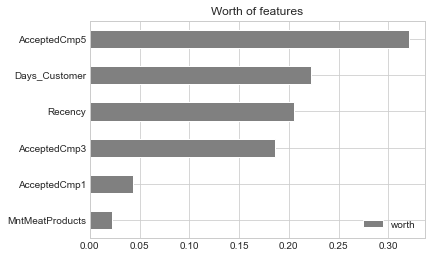

,worth
AcceptedCmp5,0.320335
Days_Customer,0.222591
Recency,0.205216
AcceptedCmp3,0.185775
AcceptedCmp1,0.043467
MntMeatProducts,0.022615


In [53]:
# Obtendo uma lista de recursos sem variáveis ​​categóricas, ID e resposta
columns = data_.columns
columns = columns.drop(["ID", "Response", "Marital_Status", "Education"])


dta_feat_worth(data_, columns, "Response", 5, 100, 10, seed)

## 3. Engenharia de recursos

Agora, com um meio de comparar recursos de acordo com seu valor, podemos extrair novos recursos dos que já temos para buscar melhores recursos.

Vamos criar todos os novos recursos e compará-los e classificá-los posteriormente, na próxima seção (4.)

### 3.1 Transformações de poder

Aplicando as transformações Box-Cox em todas as características, podemos tentar encontrar as que melhor se ajustam a cada uma em termos de capacidade de discriminação.

Mas primeiro, precisamos executar o dimensionamento de recursos em variáveis contínuas.

In [54]:
# Dado um dataframe, uma lista numérica de nomes de recursos e um sufixo para o nome das novas variáveis ​​retorna um dataframe com o
# variáveis ​​originais e novas.
def MinMaxScaling(df, num_feat_list, suffix):

    data_scaler = df[num_feat_list]

    fscaler = MinMaxScaler()
    scaled_d = fscaler.fit_transform(data_scaler.values)

    colnames = [s + suffix for s in data_scaler.columns]

    return pd.concat([df, pd.DataFrame(scaled_d, index=data_scaler.index, columns=colnames)], axis=1)


data_t = MinMaxScaling(data_, feat_n, "_t")
data_t.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,MntMeatProducts_t,MntFishProducts_t,MntSweetProducts_t,MntGoldProds_t,NumDealsPurchases_t,NumWebPurchases_t,NumCatalogPurchases_t,NumStorePurchases_t,NumWebVisitsMonth_t,Days_Customer_t
0,5524,1957.0,Other,Single,58138.0,0,0,58,635,88,...,0.316522,0.664093,0.334601,0.243094,0.200000,0.296296,0.357143,0.307692,0.35,0.948498
1,2174,1954.0,Other,Single,46344.0,1,1,38,11,1,...,0.003478,0.007722,0.003802,0.016575,0.133333,0.037037,0.035714,0.153846,0.25,0.161660
2,4141,1965.0,Other,Other,71613.0,0,0,26,426,49,...,0.073623,0.428571,0.079848,0.116022,0.066667,0.296296,0.071429,0.769231,0.20,0.446352
3,6182,1984.0,Other,Other,26646.0,1,0,26,11,4,...,0.011594,0.038610,0.011407,0.013812,0.133333,0.074074,0.000000,0.307692,0.30,0.198856
4,5324,1981.0,PhD,Other,58293.0,1,0,94,173,43,...,0.068406,0.177606,0.102662,0.041436,0.333333,0.185185,0.107143,0.461538,0.25,0.230329


In [55]:
# Recebe um dataframe que consiste apenas em recursos dimensionados e o destino e o nome do recurso de destino.
# Retorna tanto o dataframe com os recursos já transformados para a melhor transformação quanto um dicionário
# contendo o nome de cada recurso com seu melhor nome de transformação.

def power_transf(df, target_feat):

    # define a set of transformations
    trans_dict = {"x": lambda x: x, "log": np.log, "sqrt": np.sqrt, 
                  "exp": np.exp, "**1/4": lambda x: np.power(x, 0.25), 
                  "**2": lambda x: np.power(x, 2), "**4": lambda x: np.power(x, 4)}

    target = target_feat
    best_power_dict = {}
    for feature in df.columns[:-1]:
        max_test_value, max_trans, best_power_trans = 0, "", None
        for trans_key, trans_value in trans_dict.items():
            # apply transformation
            feature_trans = trans_value(df[feature])
            if trans_key == "log":
                feature_trans.loc[np.isfinite(feature_trans)==False] = -50.

            # bin feature
            bindisc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy="uniform")
            feature_bin = bindisc.fit_transform(feature_trans.values[:, np.newaxis])
            feature_bin = pd.Series(feature_bin[:, 0], index=df.index)

            # obtain contingency table
            df_ = pd.DataFrame(data={feature: feature_bin, target: df[target]})
            cont_tab = pd.crosstab(df_[feature], df_[target], margins = False)        

            # compute Chi-Squared
            chi_test_value = stats.chi2_contingency(cont_tab)[0]
            if chi_test_value > max_test_value:
                max_test_value, max_trans, best_power_trans = chi_test_value, trans_key, feature_trans      

        best_power_dict[feature] = (max_test_value, max_trans, best_power_trans)
        df[feature] = best_power_trans
        
    return df, best_power_dict

In [56]:
# Precisamos criar um dataframe contendo apenas os recursos dimensionados com o Response.
df_pt = data_t.iloc[:,-15:]
df_pt["Response"] = data_["Response"]



data_pt, best_pt = power_transf(df_pt, "Response")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in l

In [57]:
print("Melhor transformação para cada recurso:")
for key in best_pt:
    print("\t->", key, best_pt[key][1])

Melhor transformação para cada recurso:
	-> Year_Birth_t **4
	-> Income_t x
	-> Recency_t **1/4
	-> MntWines_t **2
	-> MntFruits_t sqrt
	-> MntMeatProducts_t **1/4
	-> MntFishProducts_t x
	-> MntSweetProducts_t sqrt
	-> MntGoldProds_t sqrt
	-> NumDealsPurchases_t sqrt
	-> NumWebPurchases_t sqrt
	-> NumCatalogPurchases_t sqrt
	-> NumStorePurchases_t sqrt
	-> NumWebVisitsMonth_t exp
	-> Days_Customer_t **2


In [58]:
# Substituindo as antigas colunas de recursos dimensionados pelos recursos transformados de acordo com a melhor transformação
coln = data_pt.columns[:-1]
data_t.drop(columns=coln, inplace=True)
data_t[coln] = data_pt[coln]

data_ = data_t
data_.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,MntMeatProducts_t,MntFishProducts_t,MntSweetProducts_t,MntGoldProds_t,NumDealsPurchases_t,NumWebPurchases_t,NumCatalogPurchases_t,NumStorePurchases_t,NumWebVisitsMonth_t,Days_Customer_t
0,5524,1957.0,Other,Single,58138.0,0,0,58,635,88,...,0.750068,0.664093,0.578447,0.493046,0.447214,0.544331,0.597614,0.554700,1.419068,0.899648
1,2174,1954.0,Other,Single,46344.0,1,1,38,11,1,...,0.242851,0.007722,0.061663,0.128742,0.365148,0.192450,0.188982,0.392232,1.284025,0.026134
2,4141,1965.0,Other,Other,71613.0,0,0,26,426,49,...,0.520899,0.428571,0.282574,0.340620,0.258199,0.544331,0.267261,0.877058,1.221403,0.199230
3,6182,1984.0,Other,Other,26646.0,1,0,26,11,4,...,0.328141,0.038610,0.106803,0.117525,0.365148,0.272166,0.000000,0.554700,1.349859,0.039544
4,5324,1981.0,PhD,Other,58293.0,1,0,94,173,43,...,0.511415,0.177606,0.320408,0.203559,0.577350,0.430331,0.327327,0.679366,1.284025,0.053051


### 3.2 Transformações Orientadas aos Negócios

Existem algumas transformações em nossas variáveis que podem gerar novos recursos. 
Agora nos concentramos na criação de recursos orientados ao negócio, como RFM, Monetário, Frequência, Proporção de Produtos Ouro, etc.

Eles são construídos da seguinte forma:
#### 3.2.1 Transformações Numéricas

In [59]:
# Porcentagem de Unidades Monetárias gastas em produtos de ouro do total gasto
aux = [0]* data_.shape[0]


for i in range(data_.shape[0]):
    aux[i] = data_["MntGoldProds"].iloc[i]/sum(data_[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:])
    
    
data_["PrpGoldProds"] = aux
data_["PrpGoldProds"].head()

0    0.057554
1    0.285714
2    0.057221
3    0.104167
4    0.036855
Name: PrpGoldProds, dtype: float64

In [60]:
# Número de campanhas aceitas das últimas 5 campanhas
aux = [0]* data_.shape[0]


for i in range(data_.shape[0]):
    aux[i] = sum(data_[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].iloc[i,:])
    
    
data_["NmbAccCmps"] = aux
data_["NmbAccCmps"].head()

0    0
1    0
2    0
3    0
4    0
Name: NmbAccCmps, dtype: int64

In [61]:
# Proporção de campanhas aceitas nas últimas 5 campanhas
aux = [0]* data_.shape[0]


for i in range(data_.shape[0]):
    aux[i] = sum(data_[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].iloc[i,:])/5
    
    
data_["PrpAccCmps"] = aux
data_["PrpAccCmps"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: PrpAccCmps, dtype: float64

In [62]:
# Proporção de Unidades Monetárias gastas em Vinho no total gasto
aux = [0]* data_.shape[0]


for i in range(data_.shape[0]):
    aux[i] = float(data_[["MntWines"]].iloc[i,:]/sum(data_[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
data_["PrpWines"] = aux
data_["PrpWines"].head()

0    0.415304
1    0.523810
2    0.580381
3    0.229167
4    0.425061
Name: PrpWines, dtype: float64

In [63]:
# Proporção de Unidades Monetárias gastas em Frutas em relação ao total gasto
aux = [0]* data_.shape[0]


for i in range(data_.shape[0]):
    aux[i] = float(data_[["MntFruits"]].iloc[i,:]/sum(data_[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
data_["PrpFruits"] = aux
data_["PrpFruits"].head()

0    0.057554
1    0.047619
2    0.066757
3    0.083333
4    0.105651
Name: PrpFruits, dtype: float64

In [64]:
# Proporção de Unidades Monetárias gastas em Carne em relação ao total gasto
# Proportion of Monetary Units spent on Meat out of the total spent
aux = [0]* data_.shape[0]


for i in range(data_.shape[0]):
    aux[i] = float(data_[["MntMeatProducts"]].iloc[i,:]/sum(data_[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
data_["PrpMeat"] = aux
data_["PrpMeat"].head()

0    0.357096
1    0.285714
2    0.173025
3    0.416667
4    0.289926
Name: PrpMeat, dtype: float64

In [65]:
# Proporção de Unidades Monetárias gastas em Peixes em relação ao gasto total
# Proportion of Monetary Units spent on Fish out of the total spent
aux = [0]* data_.shape[0]


for i in range(data_.shape[0]):
    aux[i] = float(data_[["MntFishProducts"]].iloc[i,:]/sum(data_[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
data_["PrpFish"] = aux
data_["PrpFish"].head()

0    0.112492
1    0.095238
2    0.151226
3    0.208333
4    0.113022
Name: PrpFish, dtype: float64

* Proporção de Unidades Monetárias gastas em Doces sobre o total gasto

In [66]:
# Proporção de Unidades Monetárias gastas em Doces sobre o total gasto
# Proportion of Monetary Units spent on Sweets out of the total spent
aux = [0]* data_.shape[0]


for i in range(data_.shape[0]):
    aux[i] = float(data_[["MntSweetProducts"]].iloc[i,:]/sum(data_[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:]))
    
data_["PrpSweets"] = aux
data_["PrpSweets"].head()

0    0.057554
1    0.047619
2    0.028610
3    0.062500
4    0.066339
Name: PrpSweets, dtype: float64

In [67]:
# Monetário
aux = [0]* data_.shape[0]


for i in range(data_.shape[0]):
    aux[i] = sum(data_[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:])
    
    
data_["Mnt"] = aux
data_["Mnt"].head()

0    1529
1      21
2     734
3      48
4     407
Name: Mnt, dtype: int64

In [68]:
# Compra Potencial
aux = [0]* data_.shape[0]


for i in range(data_.shape[0]):
    aux[i] = float(sum(data_[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].iloc[i,:])/((data_[["Income"]].iloc[i,:])*2))
    
    
data_["BuyPot"] = aux
data_["BuyPot"].head()

0    0.013150
1    0.000227
2    0.005125
3    0.000901
4    0.003491
Name: BuyPot, dtype: float64

In [69]:
# Frequência
aux = [0]* data_.shape[0]


for i in range(data_.shape[0]):
    aux[i] = sum(data_[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].iloc[i,:])
    
    
data_["Freq"] = aux
data_["Freq"].head()

0    25
1     6
2    21
3     8
4    19
Name: Freq, dtype: int64

In [70]:
# Criando o recurso RFM usando Recency, Freq e Mnt:
feature_list, n_bins = ["Recency", "Freq", "Mnt"], 5
rfb_dict = {}
for feature in feature_list:
    bindisc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy="quantile")
    feature_bin = bindisc.fit_transform(data_[feature].values[:, np.newaxis])
    feature_bin = pd.Series(feature_bin[:, 0], index=data_.index)
    feature_bin += 1
    
    if feature == "Recency":
        feature_bin = feature_bin.sub(5).abs() + 1
    rfb_dict[feature+"_bin"] = feature_bin.astype(int).astype(str)

data_["RFM"] = (rfb_dict['Recency_bin'] + rfb_dict['Freq_bin'] + rfb_dict['Mnt_bin']).astype(int)
data_.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,PrpAccCmps,PrpWines,PrpFruits,PrpMeat,PrpFish,PrpSweets,Mnt,BuyPot,Freq,RFM
0,5524,1957.0,Other,Single,58138.0,0,0,58,635,88,...,0.0,0.415304,0.057554,0.357096,0.112492,0.057554,1529,0.013150,25,355
1,2174,1954.0,Other,Single,46344.0,1,1,38,11,1,...,0.0,0.523810,0.047619,0.285714,0.095238,0.047619,21,0.000227,6,411
2,4141,1965.0,Other,Other,71613.0,0,0,26,426,49,...,0.0,0.580381,0.066757,0.173025,0.151226,0.028610,734,0.005125,21,444
3,6182,1984.0,Other,Other,26646.0,1,0,26,11,4,...,0.0,0.229167,0.083333,0.416667,0.208333,0.062500,48,0.000901,8,422
4,5324,1981.0,PhD,Other,58293.0,1,0,94,173,43,...,0.0,0.425061,0.105651,0.289926,0.113022,0.066339,407,0.003491,19,143


#### 3.2.2 Mesclando categorias
Agora, em relação às transformações orientadas ao negócio, também precisamos mesclar categorias sem alta capacidade de discriminação para facilitar o algoritmo de ML que empregaremos.

Observando as habilidades de discriminação de nossos recursos no ponto 1.2.2, conseguimos definir estas estratégias:
- Educação: Doutorado, Mestre, outros;
- Status_conjugal: Solteiro, Viúvo, Divorciado, outros;
- Kidhome & Teenhome: será mesclado em um recurso binário indicando a presença de descendentes.

In [71]:
# Categorias de mesclagem
# em Marital_Status: "Solteiro" como 3, "Viúva" como 2, "Divorciado" como 1 e ["Casado", "Juntos"] como 0
data_["Marital_Status_bin"] = data_['Marital_Status'].apply(lambda x: 3 if x == "Single" else
                                                            (2 if x == "Widow" else
                                                             (1 if x == "Divorced" else 0))).astype(int)

# in Education: "Phd" as 2, "Master" as 1 and ['Graduation', 'Basic', '2n Cycle'] as 0
data_["Education_bin"] = data_['Education'].apply(lambda x: 2 if x == "PhD" else (1 if x == "Master" else 0)).astype(int)

In [72]:
data_["Kidhome"] = data_['Kidhome'].astype(int)
data_["Teenhome"] = data_['Teenhome'].astype(int)
data_["NumberOff"] = data_['NumberOff'].astype(int)

In [73]:
# HasOffsrping Feature
"""
aux = [0]* data_.shape[0]


for i in range(data_.shape[0]):
    if(int(data_[["Kidhome"]].iloc[i,:])+int(data_[["Teenhome"]].iloc[i,:])>0):
        aux[i] = 1
    else:
        aux[i] = 0
    
data_["HasOffspring"] = aux
data_["HasOffspring"].head()"""

'\naux = [0]* data_.shape[0]\n\n\nfor i in range(data_.shape[0]):\n    if(int(data_[["Kidhome"]].iloc[i,:])+int(data_[["Teenhome"]].iloc[i,:])>0):\n        aux[i] = 1\n    else:\n        aux[i] = 0\n    \ndata_["HasOffspring"] = aux\ndata_["HasOffspring"].head()'

In [74]:
# Adding these new categorical features to the list:
#feat_c.append("Marital_Status_bin")
#feat_c.append("Education_bin")
#feat_c.append("HasOffspring")

# Our data now:
data_.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,PrpFruits,PrpMeat,PrpFish,PrpSweets,Mnt,BuyPot,Freq,RFM,Marital_Status_bin,Education_bin
0,5524,1957.0,Other,Single,58138.0,0,0,58,635,88,...,0.057554,0.357096,0.112492,0.057554,1529,0.013150,25,355,3,0
1,2174,1954.0,Other,Single,46344.0,1,1,38,11,1,...,0.047619,0.285714,0.095238,0.047619,21,0.000227,6,411,3,0
2,4141,1965.0,Other,Other,71613.0,0,0,26,426,49,...,0.066757,0.173025,0.151226,0.028610,734,0.005125,21,444,0,0
3,6182,1984.0,Other,Other,26646.0,1,0,26,11,4,...,0.083333,0.416667,0.208333,0.062500,48,0.000901,8,422,0,0
4,5324,1981.0,PhD,Other,58293.0,1,0,94,173,43,...,0.105651,0.289926,0.113022,0.066339,407,0.003491,19,143,0,2


#### 3.2.3 Análise de Componentes Principais (PCA)
PCA é uma ferramenta útil para redução de dimensionalidade. Tentaremos usá-lo como uma ferramenta de transformação, pois poderá criar novas funcionalidades úteis que consistem nos componentes principais agrupando as demais variáveis. Isso pode levar a uma boa sumarização dos dados ou a uma perda excessiva de informações.

Primeiro vamos tentar um PCA com 2 componentes:

In [75]:
columns = data_.columns
columns = columns.drop(["ID", "Response", "Marital_Status", "Education"])


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_[columns])

data_["pc1_"] = principalComponents[:,0]
data_["pc2_"] = principalComponents[:,1]

Em seguida, um PCA com 5 componentes:

In [76]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(data_[columns])

data_["pc1"] = principalComponents[:,0]
data_["pc2"] = principalComponents[:,1]
data_["pc3"] = principalComponents[:,2]
data_["pc4"] = principalComponents[:,3]
data_["pc5"] = principalComponents[:,4]

data_.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,RFM,Marital_Status_bin,Education_bin,pc1_,pc2_,pc1,pc2,pc3,pc4,pc5
0,5524,1957.0,Other,Single,58138.0,0,0,58,635,88,...,355,3,0,5922.893926,-997.235510,5922.893926,-997.235510,147.066916,258.798931,-23.084723
1,2174,1954.0,Other,Single,46344.0,1,1,38,11,1,...,411,3,0,-5900.287687,553.658751,-5900.287687,553.658751,-179.784159,-51.971202,-81.516964
2,4141,1965.0,Other,Other,71613.0,0,0,26,426,49,...,444,0,0,19379.566058,156.304735,19379.566058,156.304735,1.464758,-100.450099,-106.278853


## 4. Avaliando a seleção de recursos
Para avaliar se a seleção de recursos realizada é apropriada, usaremos o agrupamento K-Means para medir a precisão.

Primeiro, tentaremos escolher a melhor seleção de recursos que temos.

In [77]:
# Nova lista de recursos numéricos:
feat_n = data_.columns
feat_n = feat_n.drop(feat_c)
feat_n = feat_n.drop(["ID", "Response", "PrpGoldProds", "NmbAccCmps"])
feat_n = list(feat_n)

In [78]:
chisq_ranker(data_, feat_n, feat_c, "Response").head(15) #Primeiros 15 recursos classificados de acordo com chisq_ranker





,Chi-Squared,p-value,valid
PrpAccCmps,408.012297,5.164430e-87,True
AcceptedCmp5,235.467749,3.828045e-53,True
Mnt,196.971405,1.428614e-37,True
AcceptedCmp1,190.241783,2.815498e-43,True
MntWines_t,170.786603,4.231105e-32,True
MntWines,169.732680,7.014771e-32,True
MntMeatProducts_t,160.298215,6.439108e-30,True
pc2_,146.372240,1.218974e-30,True
pc2,146.372240,1.218974e-30,True
AcceptedCmp3,142.074884,9.364996e-33,True


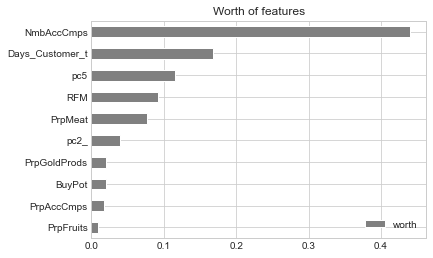

,worth
NmbAccCmps,0.440348
Days_Customer_t,0.168608
pc5,0.115851
RFM,0.091605
PrpMeat,0.076710
pc2_,0.039645
PrpGoldProds,0.020363
BuyPot,0.020309
PrpAccCmps,0.017151
PrpFruits,0.009410


In [79]:
# Obtendo uma lista de recursos sem variáveis ​​categóricas, ID e resposta
columns = data_.columns
columns = columns.drop(["ID", "Response", "Marital_Status", "Education"])


dta_feat_worth(data_t, columns, "Response", 5, 100, 10, seed)

Observando os testes acima, podemos ver algumas semelhanças, mas há discrepância no sentido de que, em geral, para o chisq_ranker os recursos de contagem são priorizados, enquanto o teste dta_feat_worth parece dar mais valor aos recursos de proporção.


Tentaremos organizar uma seleção de recursos que incorporem a melhor combinação dos resultados de ambos os testes.

Esta tentativa será com esta lista de funcionalidades:
- PrpAccCmps
- RFM
- Mnt
- PrpMeat
- Days_Customer_t
- MntWines_t
- PrpGoldProds
- Marital_Status_bin

$Nota$: Embora o pc5 pareça uma boa escolha de recurso, não usaremos nenhum dos novos recursos do PCA aqui porque haverá uma interação estranha quando usarmos o PCA para plotar o resultado K-Means em duas dimensões.

In [80]:
feature_list = ["PrpAccCmps", "RFM", "Mnt", "PrpMeat", "Days_Customer_t",
                     "MntWines_t", "PrpGoldProds", "Marital_Status_bin"]

features_df = data_t[feature_list]

Agora usamos um Standard Scaler para executar o dimensionamento de recursos em todos os recursos selecionados.

In [81]:
scaled_features = StandardScaler().fit_transform(features_df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=features_df.index, columns=features_df.columns)

A configuração do modelo K-Means com $K=2$ como o recurso de destino, Resposta, mostra apenas dois estados (0 ou 1).

In [82]:
K = 2

kmeans = KMeans(n_clusters=K, max_iter=1000, random_state=12345, init = 'k-means++') # Set the number of clusters we want, the maximum number of iteration and a seed for the random state.
kmeans.fit(scaled_features_df)
labels = kmeans.labels_

Agora podemos plotar os resultados.

Em um espaço bidimensional só podemos comparar duas características por vez.

Use x e y para selecionar a variável de acordo com sua posição na feature_list:

In [83]:
feature_list

['PrpAccCmps',
 'RFM',
 'Mnt',
 'PrpMeat',
 'Days_Customer_t',
 'MntWines_t',
 'PrpGoldProds',
 'Marital_Status_bin']

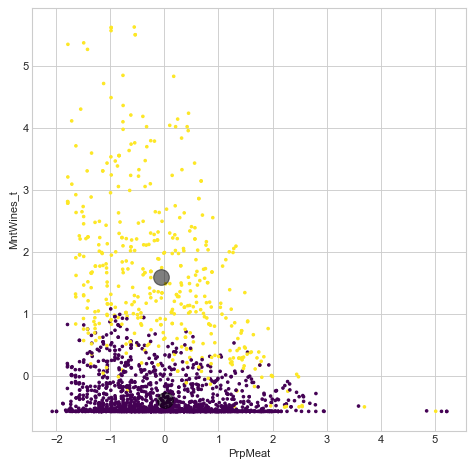

In [84]:
# Plotando os clusters resultantes:

plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')


x = 3 # Select the variable that goes into the X axis in the graph.
y = 5 # Select the variable that goes into the Y axis in the graph.
plt.scatter(scaled_features_df.iloc[:, x], scaled_features_df.iloc[:, y], c=labels, s=5, cmap='viridis')




centers_cv = kmeans.cluster_centers_
plt.scatter(centers_cv[:, x], centers_cv[:, y], c='black', s=200, alpha=0.5);
plt.xlabel(scaled_features_df.columns[x], fontsize=10)
plt.ylabel(scaled_features_df.columns[y], fontsize=10)

plt.show()

Para obter uma avaliação multidimensional do comportamento do modelo K-Means, usaremos a Análise de Componentes Principais (PCA) para realizar uma redução de dimensão de N para 2. A PCA consegue isso por meio de uma transformação ortogonal.

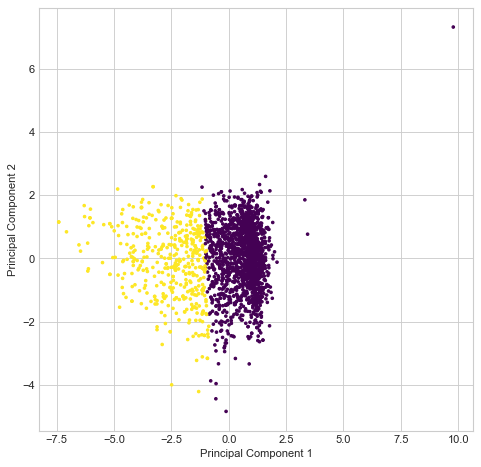

In [85]:
plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_features_df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])


plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1], c=labels, s=5, cmap='viridis')
plt.xlabel(principalDf.columns[0], fontsize=10)
plt.ylabel(principalDf.columns[1], fontsize=10)
plt.show()

Podemos ver o saldo de pontos atribuídos a cada cluster. Mais pontos foram atribuídos ao cluster 0 do que ao cluster 1.

In [86]:
Counter(labels)

Counter({1: 437, 0: 1803})

In [87]:
sum(data_t["Response"])

334

Embora o modelo tenha atribuído 1419 a um cluster e 367 a outro, apenas 265 do total de clientes responderam positivamente à campanha.

367 é um pouco próximo de 265

Para medir a precisão, contamos quantos pontos o modelo K-Means atribuiu corretamente e dividimos pelo comprimento do nosso banco de dados:

In [88]:
sum(labels==data_t["Response"])/len(data_t["Response"])

0.8022321428571428

79% de precisão é uma medida decente. Poderíamos mexer um pouco mais com a seleção de recursos ou ir para o pipeline.

## 5. Balanceando o conjunto de dados

In [89]:
data_complete = data_t.drop(columns=['ID', 'Education', 'Marital_Status'])
data_complete.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,RFM,Marital_Status_bin,Education_bin,pc1_,pc2_,pc1,pc2,pc3,pc4,pc5
0,1957.0,58138.0,0,0,58,635,88,546,172,88,...,355,3,0,5922.893926,-997.235510,5922.893926,-997.235510,147.066916,258.798931,-23.084723
1,1954.0,46344.0,1,1,38,11,1,6,2,1,...,411,3,0,-5900.287687,553.658751,-5900.287687,553.658751,-179.784159,-51.971202,-81.516964
2,1965.0,71613.0,0,0,26,426,49,127,111,21,...,444,0,0,19379.566058,156.304735,19379.566058,156.304735,1.464758,-100.450099,-106.278853
3,1984.0,26646.0,1,0,26,11,4,20,10,3,...,422,0,0,-25594.571738,171.180444,-25594.571738,171.180444,-205.037574,-21.511068,-100.406431
4,1981.0,58293.0,1,0,94,173,43,118,46,27,...,143,0,2,6054.528304,333.374627,6054.528304,333.374627,-157.994651,-9.358161,195.788588


In [90]:
cat_columns = ['Marital_Status_bin','Education_bin']
data_complete = pd.get_dummies(data_t, prefix_sep="_",
                              columns=cat_columns)
data_complete = data_complete.drop(columns=['ID', 'Education', 'Marital_Status'])

In [91]:
data_complete.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,pc3,pc4,pc5,Marital_Status_bin_0,Marital_Status_bin_1,Marital_Status_bin_2,Marital_Status_bin_3,Education_bin_0,Education_bin_1,Education_bin_2
0,1957.0,58138.0,0,0,58,635,88,546,172,88,...,147.066916,258.798931,-23.084723,0,0,0,1,1,0,0
1,1954.0,46344.0,1,1,38,11,1,6,2,1,...,-179.784159,-51.971202,-81.516964,0,0,0,1,1,0,0
2,1965.0,71613.0,0,0,26,426,49,127,111,21,...,1.464758,-100.450099,-106.278853,1,0,0,0,1,0,0
3,1984.0,26646.0,1,0,26,11,4,20,10,3,...,-205.037574,-21.511068,-100.406431,1,0,0,0,1,0,0
4,1981.0,58293.0,1,0,94,173,43,118,46,27,...,-157.994651,-9.358161,195.788588,1,0,0,0,0,0,1


In [92]:
train_data, test_data, train_label, test_label = train_test_split(data_complete,
                                                                  data_complete["Response"],
                                                                  test_size=0.3,
                                                                  random_state=seed)

In [93]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
df_scaled = scaler.fit_transform(train_data)
df_scaled = pd.DataFrame(df_scaled, columns=[train_data.columns])
df_scaled.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,pc3,pc4,pc5,Marital_Status_bin_0,Marital_Status_bin_1,Marital_Status_bin_2,Marital_Status_bin_3,Education_bin_0,Education_bin_1,Education_bin_2
0,0.781818,0.020476,0.5,0.0,0.515152,0.003351,0.010050,0.009275,0.011583,0.007634,...,0.401417,0.412450,0.497347,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.127273,0.049236,0.5,0.5,0.585859,0.012735,0.030151,0.011594,0.000000,0.019084,...,0.121127,0.331299,0.509654,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.636364,0.126141,0.0,0.5,0.898990,0.480563,0.211055,0.500870,0.845560,0.114504,...,0.280299,0.561745,0.874890,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.127273,0.120767,0.0,0.0,0.545455,0.222520,0.974874,0.218551,0.575290,0.477099,...,0.094288,0.427306,0.482412,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.236364,0.066181,0.0,0.5,0.929293,0.126005,0.015075,0.104348,0.077220,0.011450,...,0.246637,0.385645,0.882937,1.0,0.0,0.0,0.0,0.0,1.0,0.0


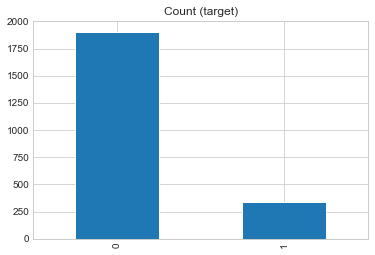

In [94]:


data_complete['Response'].value_counts().plot(kind='bar', title='Count (target)');



In [95]:
#EDA on Univariate Categorical variables
def cat_feat(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    fig.suptitle(col_data.name+' Wise Sale',fontsize=15)
    sns.countplot(col_data,ax=ax[0])
    col_data.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1], shadow = True)
    plt.tight_layout()
    
    


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


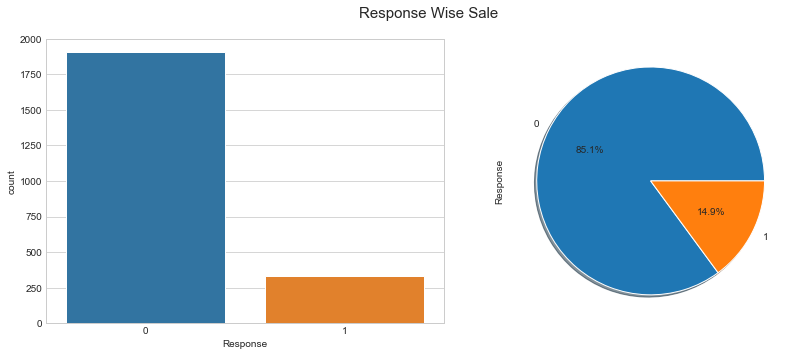

In [96]:
cat_feat(data_complete['Response'])

In [97]:
drop = ['Response','Education', 'Marital_Status']
labels = data_complete.columns[~data_complete.columns.isin(drop)]

In [98]:
labels

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'NumberOff', 'Days_Customer',
       'Year_Birth_t', 'Income_t', 'Recency_t', 'MntWines_t', 'MntFruits_t',
       'MntMeatProducts_t', 'MntFishProducts_t', 'MntSweetProducts_t',
       'MntGoldProds_t', 'NumDealsPurchases_t', 'NumWebPurchases_t',
       'NumCatalogPurchases_t', 'NumStorePurchases_t', 'NumWebVisitsMonth_t',
       'Days_Customer_t', 'PrpGoldProds', 'NmbAccCmps', 'PrpAccCmps',
       'PrpWines', 'PrpFruits', 'PrpMeat', 'PrpFish', 'PrpSweets', 'Mnt',
       'BuyPot', 'Freq', 'RFM', 'pc1_', 'pc2_', 'pc1', 'pc2', 'pc3', 'pc4',
       'pc5', 'Marital_Status_bin_0', 'Marital_Status_bin_1

#### Subamostragem ( Sub Amostra )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


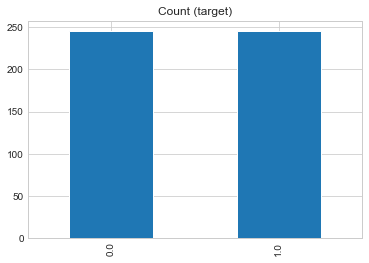

In [99]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(df_scaled[labels], df_scaled['Response'])
df_under = pd.DataFrame(X_resampled, columns=labels)
df_under['Response'] = y_resampled
df_under['Response'].value_counts().plot(kind='bar', title='Count (target)');

In [100]:
df_under.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,pc4,pc5,Marital_Status_bin_0,Marital_Status_bin_1,Marital_Status_bin_2,Marital_Status_bin_3,Education_bin_0,Education_bin_1,Education_bin_2,Response
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,490.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500511
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


#### Sobreamostragem

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


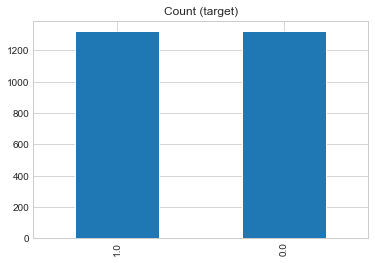

In [101]:
from imblearn.over_sampling import SMOTE

smote = SMOTE( n_jobs=-1)
X_sm, y_sm = smote.fit_resample(df_scaled[labels], df_scaled['Response'])

df_over = pd.DataFrame(X_sm, columns=labels)
df_over['Response'] = y_sm

df_over['Response'].value_counts().plot(kind='bar', title='Count (target)');

In [102]:
df_over.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,pc4,pc5,Marital_Status_bin_0,Marital_Status_bin_1,Marital_Status_bin_2,Marital_Status_bin_3,Education_bin_0,Education_bin_1,Education_bin_2,Response
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2646.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500095
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


## 6. Pipeline de Exportação
E quando estivermos satisfeitos, podemos exportar nossos dados como .xslx para serem alimentados em nosso pipeline.

In [111]:
data_t.to_excel("E:\\PYTHON\\Ifood\\train_dataset_seed1.xlsx")

Models to test:
- Decision Tree
- Logistic Regression
- Random Forest
- SVM
- ANN

## Aprendizado Profundo

In [104]:
train_data.shape

(1568, 66)

In [105]:
from keras import models

In [106]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(5, activation='relu', input_dim=66))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [107]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [108]:
history = model.fit(train_data, train_label, epochs=100)

Epoch 1/100
49/49 [==============================] - 1s 2ms/step - loss: 2435.5288 - accuracy: 0.2009
Epoch 2/100
49/49 [==============================] - 0s 1ms/step - loss: 958.9292 - accuracy: 0.2659
Epoch 3/100
49/49 [==============================] - 0s 2ms/step - loss: 137.5901 - accuracy: 0.4936
Epoch 4/100
49/49 [==============================] - 0s 2ms/step - loss: 0.7837 - accuracy: 0.8399
Epoch 5/100
49/49 [==============================] - 0s 2ms/step - loss: 0.6483 - accuracy: 0.8386
Epoch 6/100
49/49 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.8438
Epoch 7/100
49/49 [==============================] - 0s 2ms/step - loss: 0.5853 - accuracy: 0.8425
Epoch 8/100
49/49 [==============================] - 0s 2ms/step - loss: 0.5674 - accuracy: 0.8425
Epoch 9/100
49/49 [==============================] - 0s 2ms/step - loss: 0.5550 - accuracy: 0.8431
Epoch 10/100
49/49 [==============================] - 0s 2ms/step - loss: 0.5421 - accuracy: 0.8425
Ep

In [109]:
model.evaluate(test_data, test_label)

21/21 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8676


[0.39258521795272827, 0.867559552192688]